In [1]:
import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report
from scipy.stats import entropy


from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

def MSE(Y,Y_pred):
    mse = np.mean((Y_pred-Y)**2)
    return mse

def kl_divergence(Y, Y_pred, num_bins=50):
    hist1, bin_edges = np.histogram(Y, bins=num_bins, density=True)
    hist2, _ = np.histogram(Y_pred, bins=num_bins, density=True)
    hist1 += 1e-10
    hist2 += 1e-10
    kl = entropy(hist1, hist2)

    return kl


### test the fast version

noise-free, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noise-free output
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


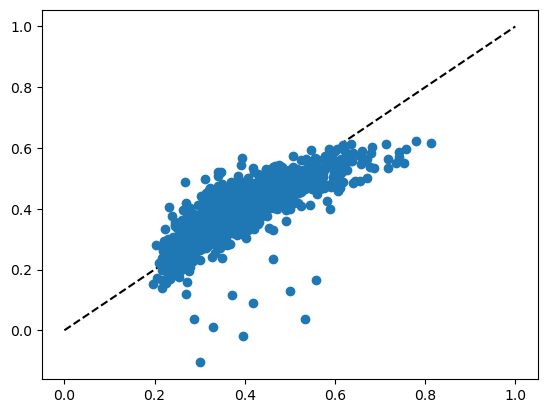

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.007350504427488697 0.7747106509521734


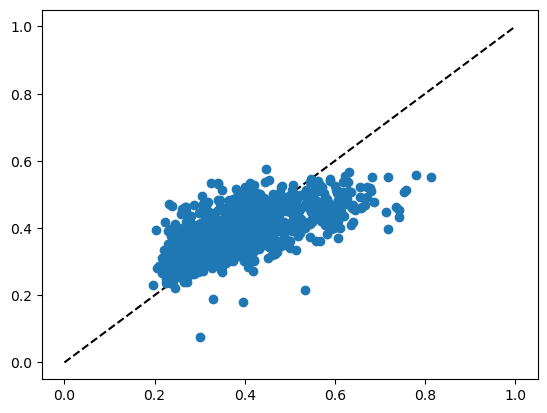

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

### test the slow version 

noise-free

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 2000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 2000
restarted
noise-free output
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


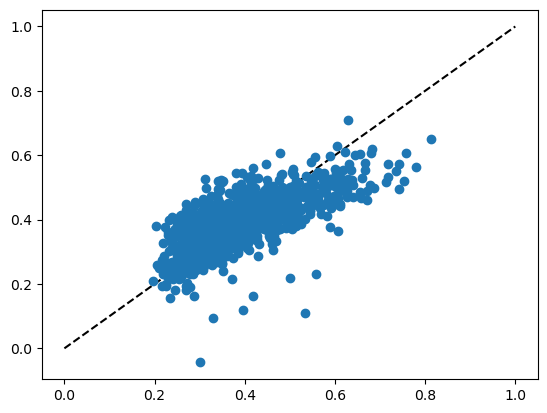

In [7]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.007080842567105186 0.7603672874015774


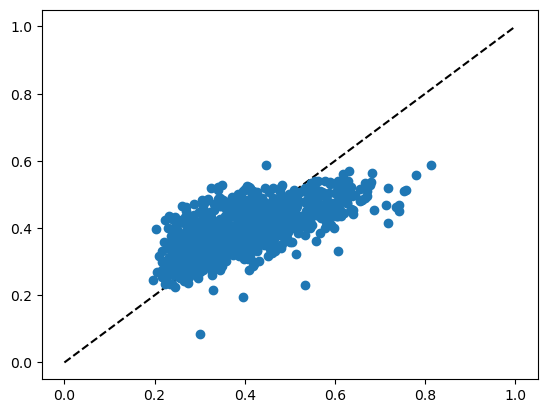

In [10]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Find out the relationship between noise and performance (baseline is NRMSE=0.6142236293701125, noise-free, fast)

### Exploring the discrepancy on noise across way of adding noise

1. slow; 2. fast; 3. current noise;


create three models

In [8]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.000,
    'noise_std':0.00015,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

train_pred_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)
train_pred_f = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

print(train_pred_s)

params['noise_enable'] = 'both'
spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
mn = spn.gen_signal_slow_delayed_feedback
train_pred_n = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mn,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)







seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 0.0001
noise-free training output


KeyboardInterrupt: 

Plot the dif of results between three models

In [9]:
spac = 0
window = 100

# pick up data
s1 = train_pred_s.flatten()
f1 = train_pred_f.flatten()
n1 = train_pred_n.flatten()
# plotting
plt.figure()
plt.plot(f1[spac:spac+window],label='fast')
plt.plot(s1[spac:spac+window],label='slow')
plt.plot(n1[spac:spac+window],label='noise')
plt.legend()
plt.show()

dif_fs = f1-s1
plt.figure()
plt.plot(dif_fs[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()

dif_fn = f1-n1
plt.figure()
plt.plot(dif_fn[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and mn')
plt.show()



NameError: name 'train_pred_n' is not defined

let's collect all noises

In [ ]:
dif_1d = []


for i in range(30):
# pick up data
    s = train_pred_s[i]
    f = train_pred_f[i]

    dif = (f-s)

    dif_1d.append(dif)
dif_1d = np.array(dif_1d)
dif_1d = dif_1d.flatten()
print(dif_1d.shape)

(900,)


plot the distrbution picture of noise

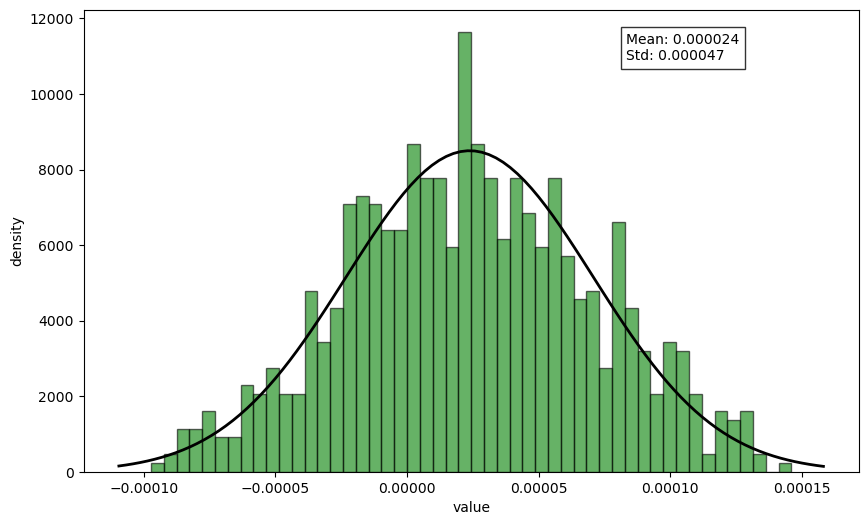

In [87]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(dif_1d, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_1d) 
std_dif = np.std(dif_1d) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

Get a more reasonable value of nose N(0.000024, 0.000047). add it to noise model and see it. Notice: add it in both.

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 2.4e-05
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 2.4e-05
noise-free testing output
restarted
Spacer NRMSE:0
0.006263460223126876 0.7151351370119321


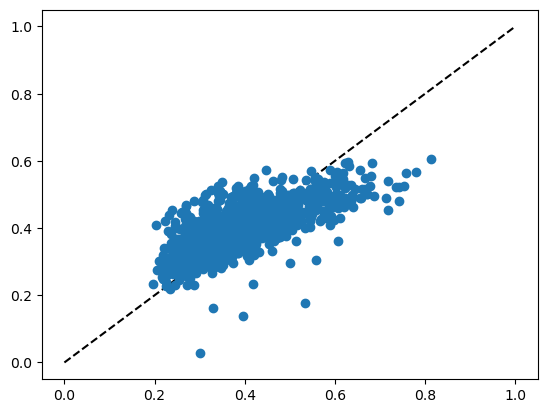

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'train',
    'noise_seed': 1234,
    'noise_mean':0.000024,
    'noise_std':0.000047,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

mn = spn.gen_signal_slow_delayed_feedback

nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mn,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)

Check the magnitude of noise in test

In [104]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

(y_test,pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
(y_test,pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522

Plot the noise in test

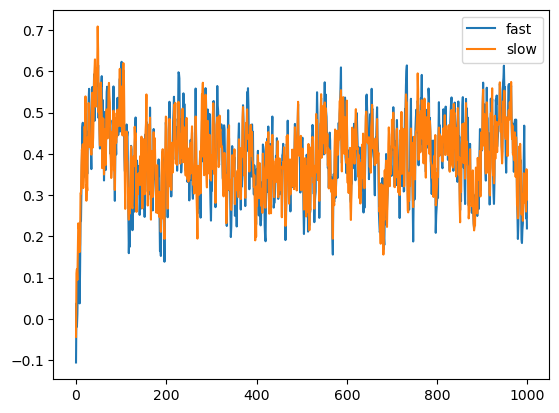

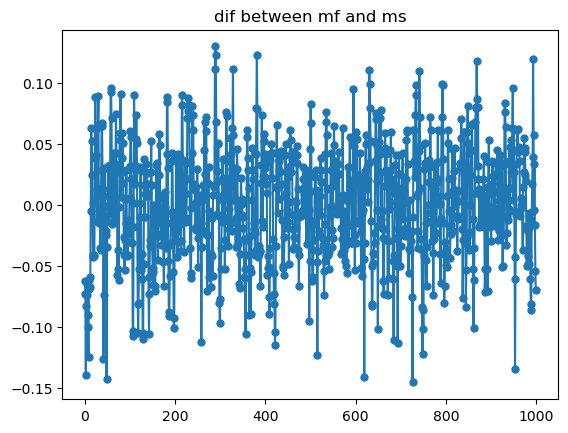

In [105]:
spac = 0
window = 1000

# pick up data

# plotting
plt.figure()
plt.plot(pred_f[spac:spac+window],label='fast')
plt.plot(pred_s[spac:spac+window],label='slow')
plt.legend()
plt.show()

dif_pred_fs = pred_f-pred_s
plt.figure()
plt.plot(dif_pred_fs[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()



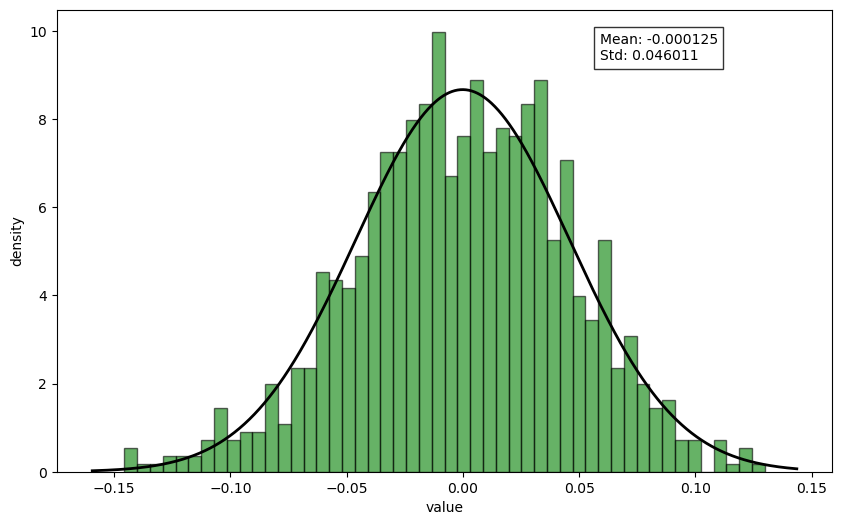

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(dif_pred_fs, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_pred_fs) 
std_dif = np.std(dif_pred_fs) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

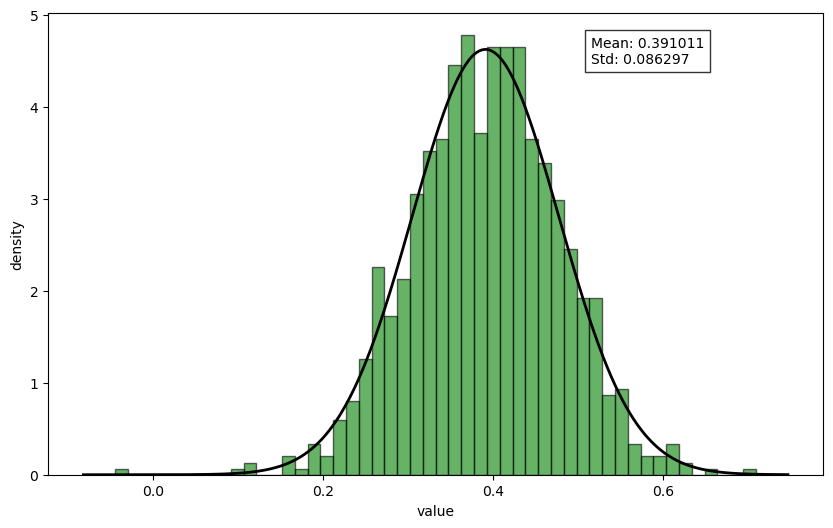

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(pred_s, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(pred_s) 
std_dif = np.std(pred_s) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

### Do some error analysis for deep understanding

#### test data

##### Scatter Plotting

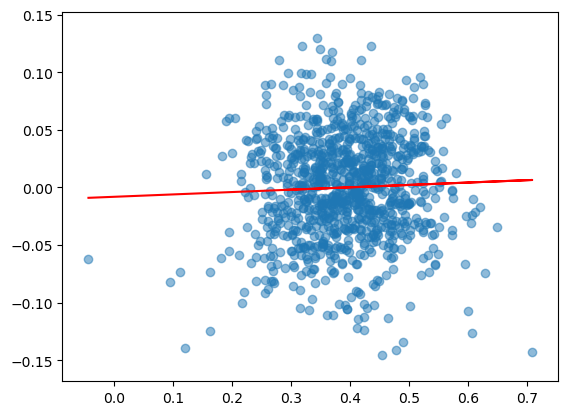

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


f = pred_f.flatten()
s = pred_s.flatten()
noise = dif_pred_fs.flatten()   


slope, intercept, r_value, p_value, std_err = linregress(s, noise)
trend_line = slope * s + intercept

plt.figure()
plt.scatter(s, noise, alpha=0.5)
plt.plot(s, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
plt.show()


# mask = (f >= 0.2) & (f <= 0.6)
# filtered_f = f[mask]
# filtered_noise = noise[mask]

# slope, intercept, r_value, p_value, std_err = linregress(filtered_f, filtered_noise)    
# trend_line = slope * filtered_f + intercept

# plt.figure()
# plt.scatter(filtered_f, filtered_noise, alpha=0.5)
# plt.plot(filtered_f, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
# plt.show()




##### Pearson coefficient

In [108]:
from scipy.stats import pearsonr, spearmanr

# 计算皮尔逊相关系数
pearson_corr, pearson_p = pearsonr(s, noise)
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.3f}")

# 计算斯皮尔曼相关系数
spearman_corr, spearman_p = spearmanr(s, noise)
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}, p-value: {spearman_p:.3f}")

# # 计算皮尔逊相关系数
# pearson_corr, pearson_p = pearsonr(filtered_f, filtered_noise)
# print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.3f}")

# # 计算斯皮尔曼相关系数
# spearman_corr, spearman_p = spearmanr(filtered_f, filtered_noise)
# print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}, p-value: {spearman_p:.3f}")



Pearson Correlation Coefficient: 0.04, p-value: 0.222
Spearman Correlation Coefficient: 0.05, p-value: 0.136


##### Phase error

                      mean       std  count bin_center
binned                                                
(-0.0439, 0.107] -0.082530       NaN      1    0.03155
(0.107, 0.257]   -0.009033  0.055139     54    0.18200
(0.257, 0.408]    0.000176  0.044733    511    0.33250
(0.408, 0.558]    0.002769  0.045353    413    0.48300
(0.558, 0.709]   -0.036328  0.047738     20    0.63350


<Figure size 800x600 with 0 Axes>

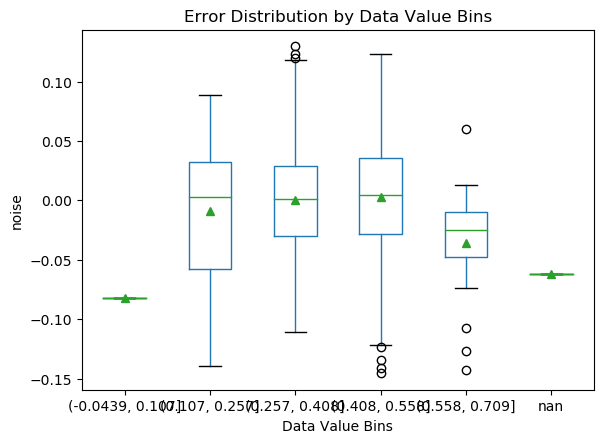

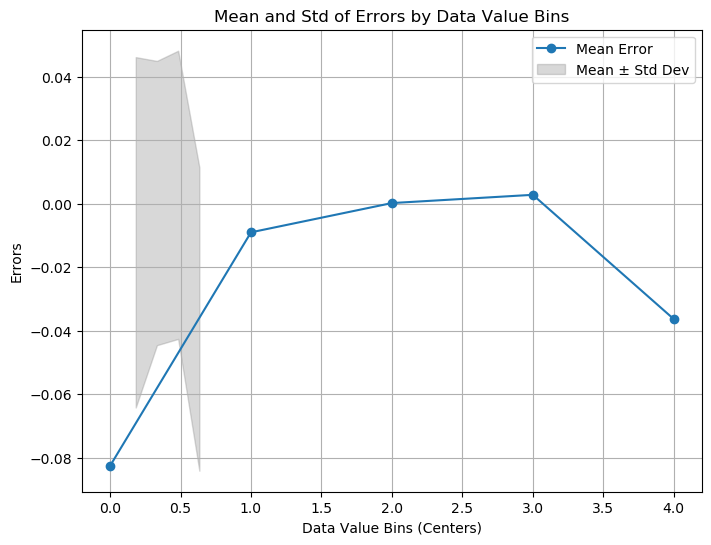

In [110]:
import pandas as pd

data = pd.DataFrame({'s': s, 'noise': noise})

# 按分段划分
bins = np.linspace(data['s'].min(), data['s'].max(), 6)
data['binned'] = pd.cut(data['s'], bins)

# 统计每段的误差特性
grouped = data.groupby('binned')['noise']
stats = grouped.agg(['mean', 'std', 'count'])
stats['bin_center'] = stats.index.map(lambda x: x.mid)  # 计算区间中心点
print(stats)

# 绘制箱线图
data['binned'] = data['binned'].astype(str)  # 转换为字符串类型
plt.figure(figsize=(8, 6))
data.boxplot(column='noise', by='binned', grid=False, showmeans=True)
plt.xlabel("Data Value Bins")
plt.ylabel("noise")
plt.title("Error Distribution by Data Value Bins")
plt.suptitle("")  # 去掉默认副标题
plt.show()

# 绘制均值和标准差趋势
plt.figure(figsize=(8, 6))
plt.plot(stats['bin_center'], stats['mean'], marker='o', label='Mean Error')
plt.fill_between(stats['bin_center'], stats['mean'] - stats['std'], stats['mean'] + stats['std'], 
                 color='gray', alpha=0.3, label='Mean ± Std Dev')

plt.title("Mean and Std of Errors by Data Value Bins")
plt.xlabel("Data Value Bins (Centers)")
plt.ylabel("Errors")
plt.legend()
plt.grid()
plt.show()


##### ACF & PACF

(1000,)
(1000,)


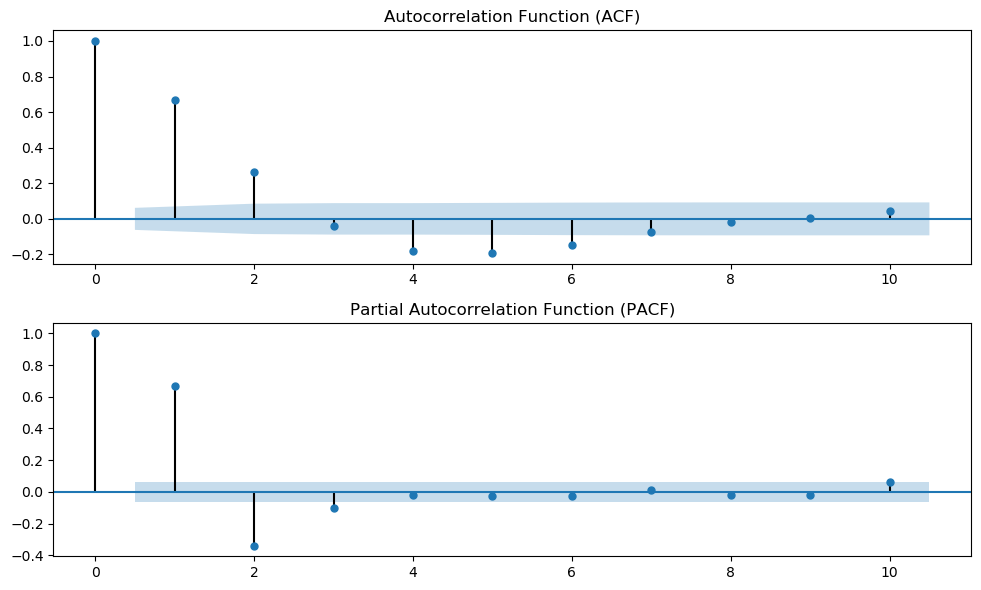

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time = np.arange(0, 1000)  # 时间序列

print(time.shape)
print(noise.shape)

# ACF 和 PACF 图
plt.figure(figsize=(10, 6))

# 绘制自相关函数（ACF）
plt.subplot(2, 1, 1)
plot_acf(noise, lags=10, ax=plt.gca())  # 设置最大滞后阶数为 20
plt.title("Autocorrelation Function (ACF)")

# 绘制偏自相关函数（PACF）
plt.subplot(2, 1, 2)
plot_pacf(noise, lags=10, ax=plt.gca(), method='ywm')  # 使用 Yule-Walker 方程
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [76]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

f = f.flatten()
noise = noise.flatten()
mask = (f >= 0.2) & (f <= 0.6)
filtered_f = f[mask]
filtered_noise = noise[mask]


# 构建 DataFrame
data = pd.DataFrame({'DataValues': f, 'Noise': noise})
# data ['DataValues'] = np.sqrt(data['DataValues'] + 1e-5)

# 添加滞后变量（Lag 2）
data['Lag2'] = data['Noise'].shift(2)
data['Lag1'] = data['Noise'].shift(1)   
data['Lag3'] = data['Noise'].shift(3)
data['RateOfChange'] = data['DataValues'].diff()

# 删除包含 NaN 的行（由于滞后会导致前两行为空）
data.dropna(inplace=True)

print(data.head())  # 查看带滞后变量的数据


   DataValues     Noise      Lag2      Lag1      Lag3  RateOfChange
3    0.011453 -0.082530 -0.073196 -0.139448 -0.062065      0.030643
4    0.088924 -0.073532 -0.139448 -0.082530 -0.073196      0.077471
5    0.166168 -0.065310 -0.082530 -0.073532 -0.139448      0.077244
6    0.129470 -0.090576 -0.073532 -0.065310 -0.082530     -0.036698
7    0.115615 -0.100167 -0.065310 -0.090576 -0.073532     -0.013855


#### Test the improvement of linear regression function

In [113]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

(y_test,pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
(y_test,pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522

In [16]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': True,
    'noise_mean_train':0.000011,
    'noise_std_train':0.000055,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn1 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms1 = spn1.gen_signal_slow_delayed_feedback


(y_test1,pred_s1) = ml.spnc_narma10_noise(Ntrain,Ntest,Nvirt,m0,bias,ms1,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)


seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 1.1e-05
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Testing data shape:  (1000, 30)
S_test before adding noise: [[ 1.92081242e-03 -3.58363436e-04 -2.32594656e-03 ... -2.11218897e-03
  -3.34565325e-03 -6.97476762e-04]
 [ 2.40356750e-04 -8.53762663e-05 -8.07032542e-04 ... -2.83371959e-03
  -3.04371874e-03 -2.07367669e-03]
 [-6.32895711e-04 -1.34147656e-03 -2.10147857e-03 ... -3.26141215e-03
  -3.87115214e-03 -2.41989366e-03]
 ...
 [-2.52536217e-03 -4.49081460e-03 -6.42250252e-03 ... -7.14059191e-03
  -8.38775172e-03 -5.37847183e-03]
 [-3.83672184e-03

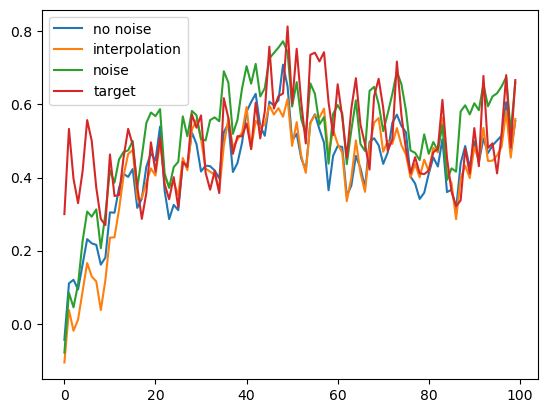

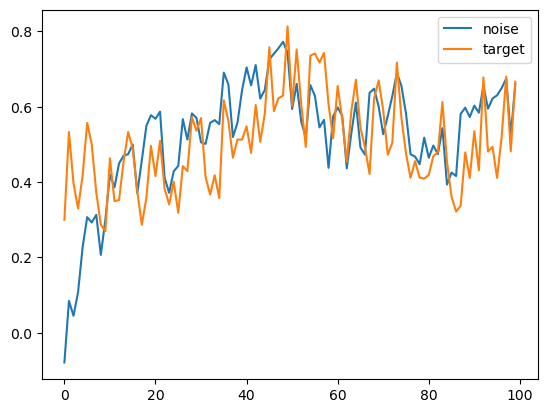

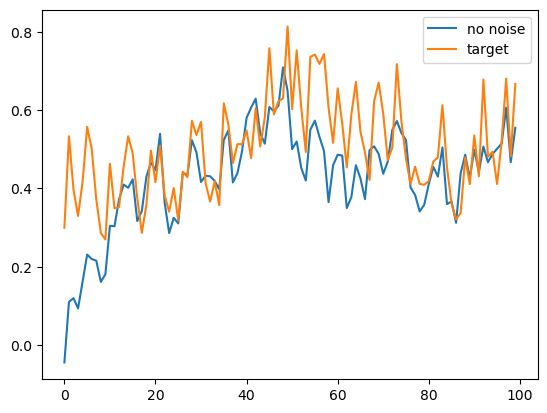

0.8861650471194819 1.0569273768717198 0.6841792058189959


In [17]:
plt.figure()
plt.plot(pred_s[0:100],label='no noise')
plt.plot(pred_f[0:100],label='interpolation')
plt.plot(pred_s1[0:100]-0.2,label='noise')
plt.plot(y_test[0:100],label='target')
plt.legend()
plt.show()


plt.figure()
# plt.plot(pred_s[0:1000],label='no noise')
# plt.plot(pred_f[0:100],label='interpolation')
plt.plot(pred_s1[0:100]-0.2,label='noise')
plt.plot(y_test[0:100],label='target')
plt.legend()
plt.show()

plt.figure()
plt.plot(pred_s[0:100],label='no noise')
# plt.plot(pred_f[0:1000],label='interpolation')
# plt.plot(pred_s1[0:100],label='noise')
plt.plot(y_test[0:100],label='target')
plt.legend()
plt.show()


nrmse1 = NRMSE(pred_s,y_test)
nrmse2 = NRMSE(pred_s1-0.2,y_test)
nrmse3 = NRMSE(pred_f,y_test)   
print(nrmse1,nrmse2,nrmse3)



#### train data

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

train_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)
train_f = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522

##### Difference Plotting

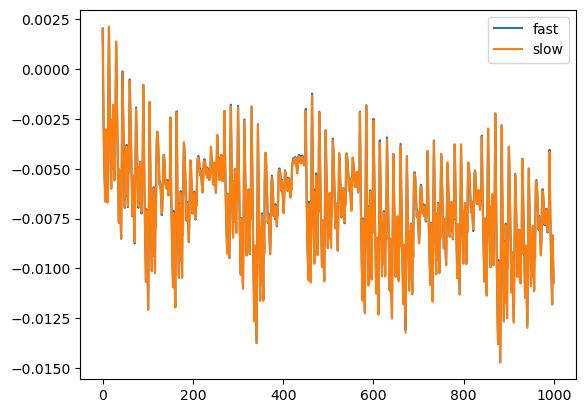

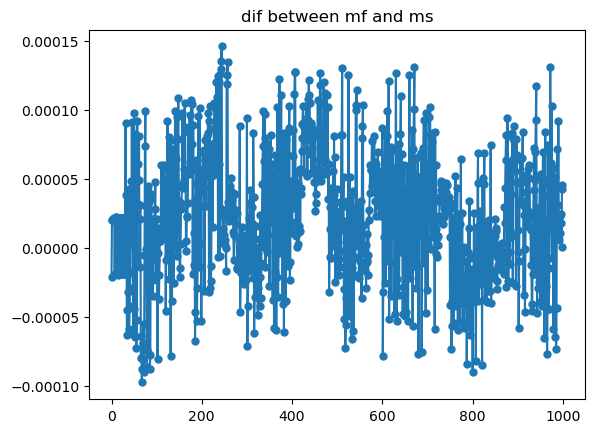

In [37]:
spac = 0
window = 1000

# pick up data
f = train_f.flatten()
s = train_s.flatten()

# plotting
plt.figure()
plt.plot(f[spac:spac+window],label='fast')
plt.plot(s[spac:spac+window],label='slow')
plt.legend()
plt.show()

dif = f-s
plt.figure()
plt.plot(dif[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()


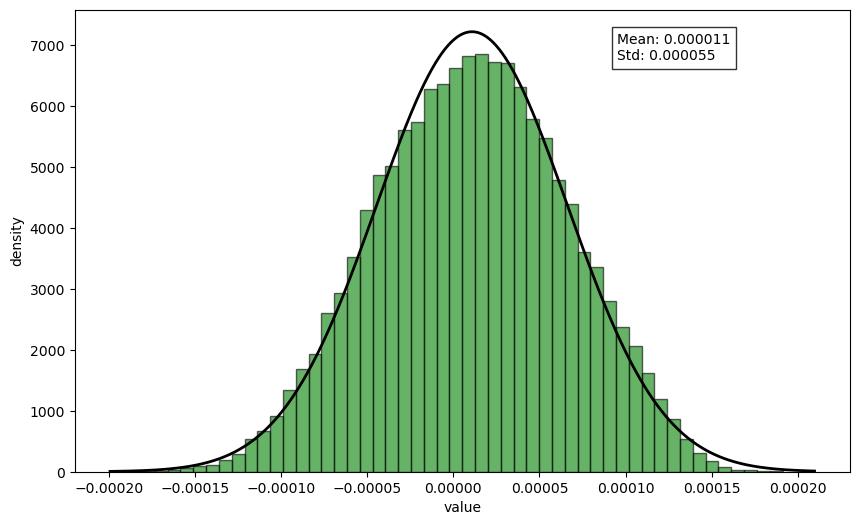

In [38]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(dif, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif) 
std_dif = np.std(dif) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

##### Scatter Plotting

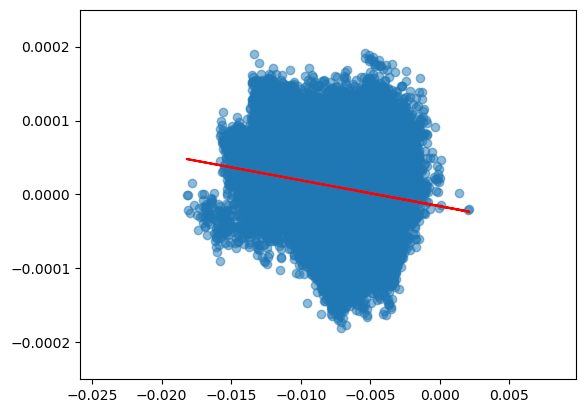

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



noise = dif 


slope, intercept, r_value, p_value, std_err = linregress(f, noise)
trend_line = slope * f + intercept

plt.figure()
plt.scatter(f, noise, alpha=0.5)
plt.plot(f, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
plt.ylim(-0.00025,0.00025)
plt.show()


# mask = (f >= 0.2) & (f <= 0.6)
# filtered_f = f[mask]
# filtered_noise = noise[mask]

# slope, intercept, r_value, p_value, std_err = linregress(filtered_f, filtered_noise)    
# trend_line = slope * filtered_f + intercept

# plt.figure()
# plt.scatter(filtered_f, filtered_noise, alpha=0.5)
# plt.plot(filtered_f, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
# plt.show()

##### Pearson Coefficient

In [45]:
from scipy.stats import pearsonr, spearmanr

# 计算皮尔逊相关系数
pearson_corr, pearson_p = pearsonr(f, noise)
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.3f}")

# 计算斯皮尔曼相关系数
spearman_corr, spearman_p = spearmanr(f, noise)
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}, p-value: {spearman_p:.3f}")

Pearson Correlation Coefficient: -0.16, p-value: 0.000
Spearman Correlation Coefficient: -0.13, p-value: 0.000


##### Phase Error

                          mean       std  count bin_center
binned                                                    
(-0.0182, -0.0159]   -0.000029  0.000019     59  -0.017050
(-0.0159, -0.0137]    0.000024  0.000040    716  -0.014800
(-0.0137, -0.0114]    0.000059  0.000049   3705  -0.012550
(-0.0114, -0.00917]   0.000033  0.000043  10905  -0.010285
(-0.00917, -0.00691] -0.000010  0.000053  19417  -0.008040
(-0.00691, -0.00465]  0.000005  0.000053  19004  -0.005780
(-0.00465, -0.0024]   0.000022  0.000059   5768  -0.003525
(-0.0024, -0.000139]  0.000032  0.000045    414  -0.001269
(-0.000139, 0.00212]  0.000007  0.000024     11   0.000991


<Figure size 800x600 with 0 Axes>

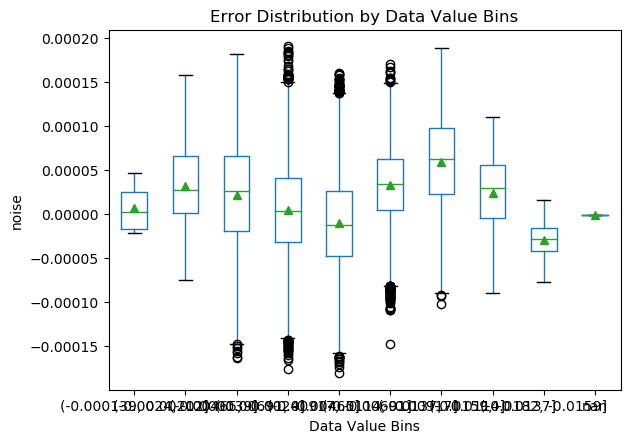

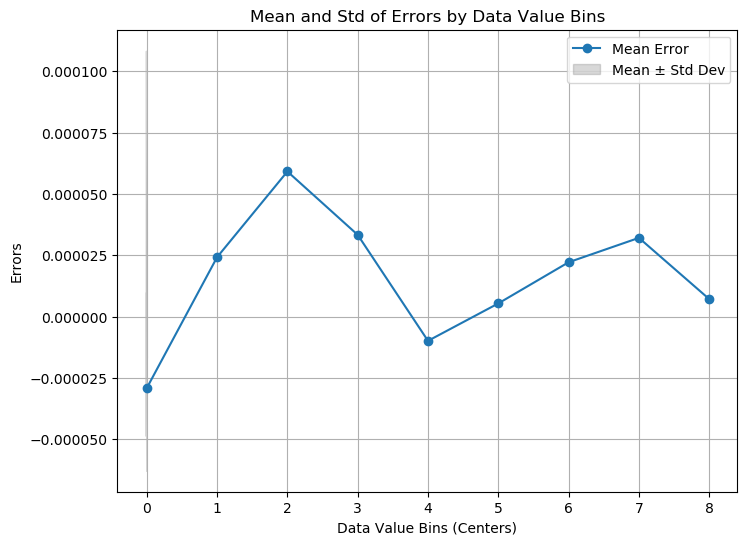

In [46]:
import pandas as pd

data = pd.DataFrame({'f': f, 'noise': noise})

# 按分段划分
bins = np.linspace(data['f'].min(), data['f'].max(), 10)
data['binned'] = pd.cut(data['f'], bins)

# 统计每段的误差特性
grouped = data.groupby('binned')['noise']
stats = grouped.agg(['mean', 'std', 'count'])
stats['bin_center'] = stats.index.map(lambda x: x.mid)  # 计算区间中心点
print(stats)

# 绘制箱线图
data['binned'] = data['binned'].astype(str)  # 转换为字符串类型
plt.figure(figsize=(8, 6))
data.boxplot(column='noise', by='binned', grid=False, showmeans=True)
plt.xlabel("Data Value Bins")
plt.ylabel("noise")
plt.title("Error Distribution by Data Value Bins")
plt.suptitle("")  # 去掉默认副标题
plt.show()

# 绘制均值和标准差趋势
plt.figure(figsize=(8, 6))
plt.plot(stats['bin_center'], stats['mean'], marker='o', label='Mean Error')
plt.fill_between(stats['bin_center'], stats['mean'] - stats['std'], stats['mean'] + stats['std'], 
                 color='gray', alpha=0.3, label='Mean ± Std Dev')

plt.title("Mean and Std of Errors by Data Value Bins")
plt.xlabel("Data Value Bins (Centers)")
plt.ylabel("Errors")
plt.legend()
plt.grid()
plt.show()

##### ACF & PACF

(60000,)
(60000,)


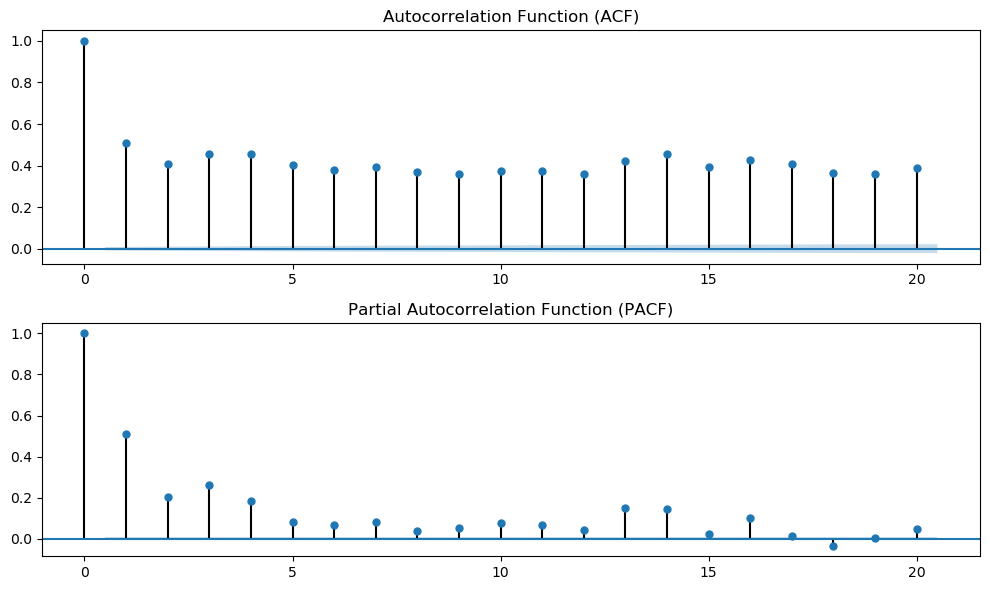

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time = np.arange(0, 60000)  # 时间序列

print(time.shape)
print(noise.shape)

# ACF 和 PACF 图
plt.figure(figsize=(10, 6))

# 绘制自相关函数（ACF）
plt.subplot(2, 1, 1)
plot_acf(noise, lags=20, ax=plt.gca())  # 设置最大滞后阶数为 20
plt.title("Autocorrelation Function (ACF)")

# 绘制偏自相关函数（PACF）
plt.subplot(2, 1, 2)
plot_pacf(noise, lags=20, ax=plt.gca(), method='ywm')  # 使用 Yule-Walker 方程
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

no dependency between noise and fast data in train phase. let's have a look it with Nv = 1

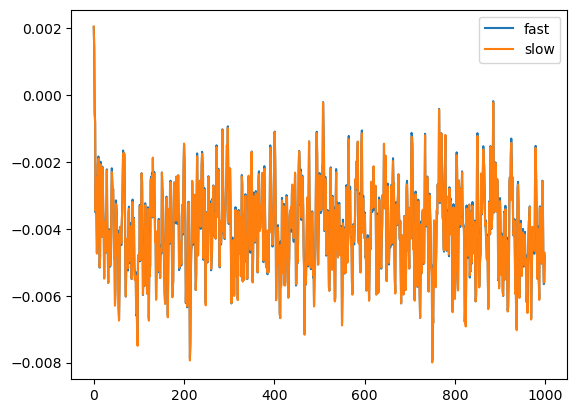

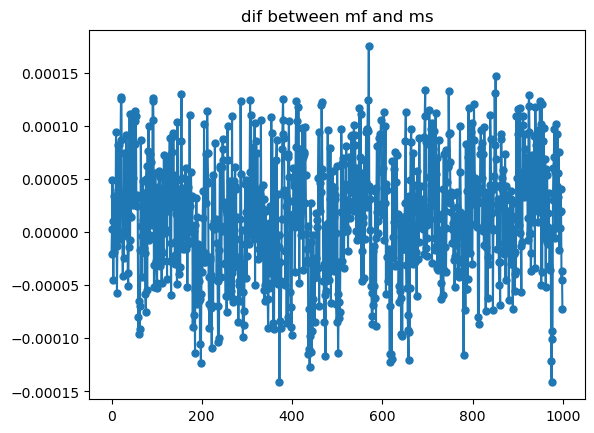

In [51]:
s_fc = train_s[:,0]  
f_fc = train_f[:,0]    

spac = 0
window = 1000


# plottin
plt.figure()
plt.plot(f_fc[spac:spac+window],label='fast')
plt.plot(s_fc[spac:spac+window],label='slow')
plt.legend()
plt.show()

dif = f_fc-s_fc
plt.figure()
plt.plot(dif[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()




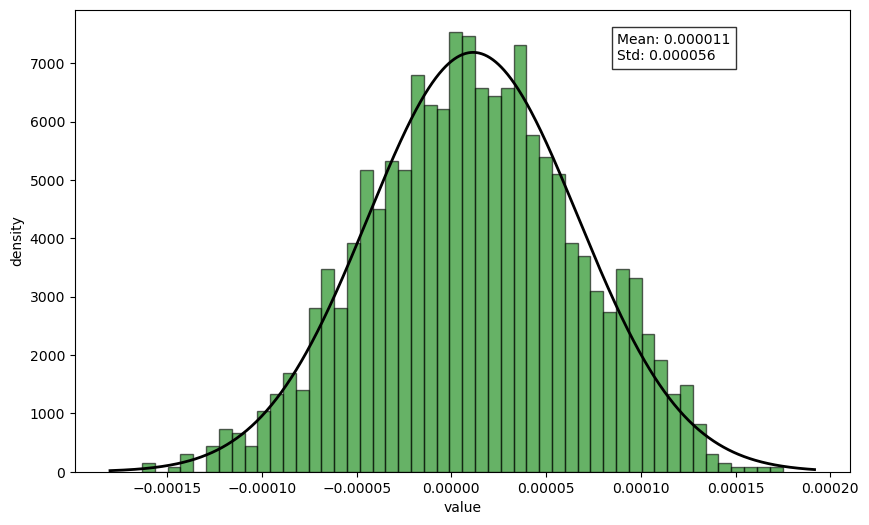

In [52]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


count, bins, ignored = plt.hist(dif, bins=50, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif) 
std_dif = np.std(dif) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

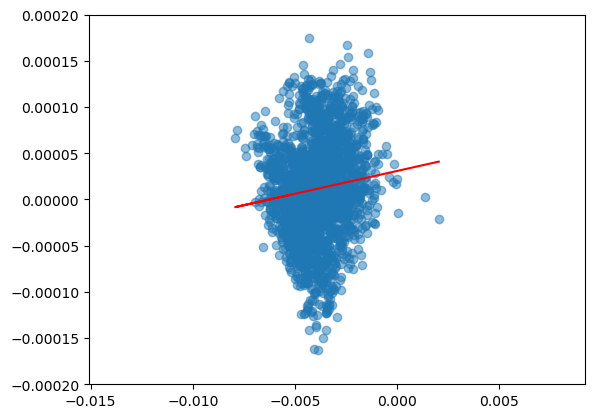

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

noise = dif 

slope, intercept, r_value, p_value, std_err = linregress(f_fc, noise)
trend_line = slope * f_fc + intercept

plt.figure()
plt.scatter(f_fc, noise, alpha=0.5)
plt.plot(f_fc, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
plt.ylim(-0.0002,0.0002)
plt.show()


(2000,)
(2000,)


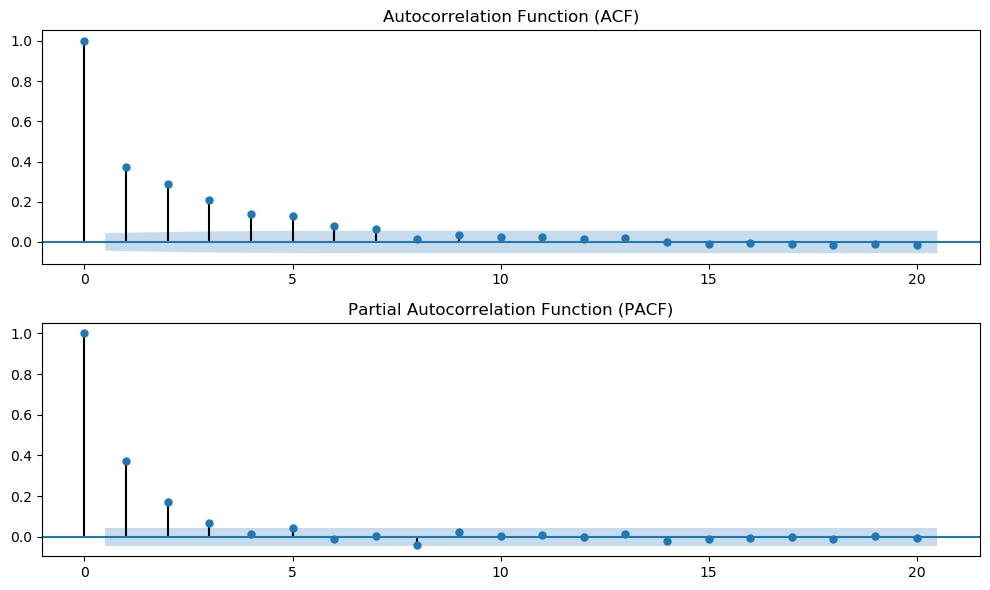

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time = np.arange(0, 2000)  # 时间序列

print(time.shape)
print(noise.shape)

# ACF 和 PACF 图
plt.figure(figsize=(10, 6))

# 绘制自相关函数（ACF）
plt.subplot(2, 1, 1)
plot_acf(noise, lags=20, ax=plt.gca())  # 设置最大滞后阶数为 20
plt.title("Autocorrelation Function (ACF)")

# 绘制偏自相关函数（PACF）
plt.subplot(2, 1, 2)
plot_pacf(noise, lags=20, ax=plt.gca(), method='ywm')  # 使用 Yule-Walker 方程
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# 构建 DataFrame
data = pd.DataFrame({'DataValues': f_fc, 'Noise': noise})
# data ['DataValues'] = np.sqrt(data['DataValues'] + 1e-5)

# 添加滞后变量（Lag 2）
data['Lag2'] = data['Noise'].shift(2)
data['Lag1'] = data['Noise'].shift(1)   
data['Lag3'] = data['Noise'].shift(3)
data['RateOfChange'] = data['DataValues'].diff()

# 删除包含 NaN 的行（由于滞后会导致前两行为空）
data.dropna(inplace=True)

print(data.head())  # 查看带滞后变量的数据


   DataValues     Noise      Lag2      Lag1      Lag3  RateOfChange
3   -0.000792  0.000010  0.000002  0.000049 -0.000021     -0.000281
4   -0.003508 -0.000045  0.000049  0.000010  0.000002     -0.002717
5   -0.002422  0.000034  0.000010 -0.000045  0.000049      0.001086
6   -0.003689 -0.000019 -0.000045  0.000034  0.000010     -0.001267
7   -0.004712  0.000030  0.000034 -0.000019 -0.000045     -0.001023


Linear Regression - R²: 0.2278
Linear Regression - MSE: 0.0000


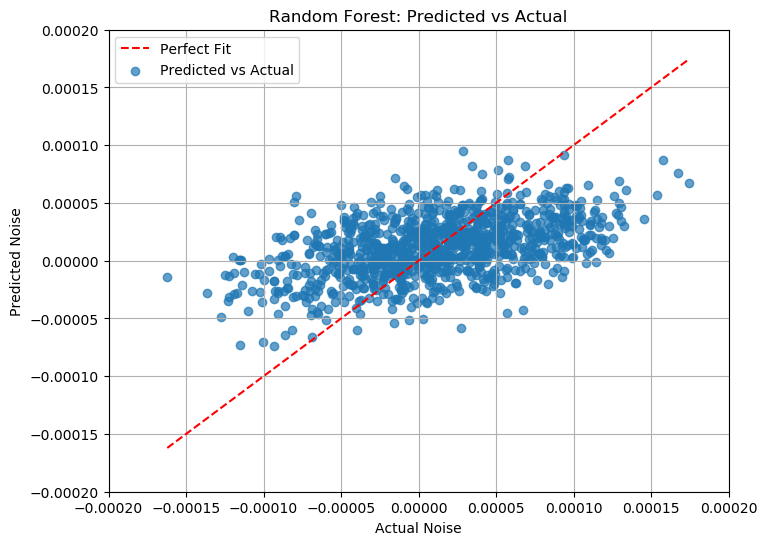

In [65]:
# 建立多元回归模型
X = data[['DataValues', 'Lag2', 'Lag1','Lag3']]  # 自变量
y = data['Noise']  # 因变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# # 随机森林回归模型

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regression - R²: {r2:.4f}")
print(f"Linear Regression - MSE: {mse:.4f}")


# rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)


# r2_rf = r2_score(y_test, y_pred)
# mse_rf = mean_squared_error(y_test, y_pred)

# print(f"Random Forest - R²: {r2_rf:.4f}")
# print(f"Random Forest - MSE: {mse_rf:.4f}")



# 可视化实际值与预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlim(-0.0002,0.0002)
plt.ylim(-0.0002,0.0002)
plt.xlabel('Actual Noise')
plt.ylabel('Predicted Noise')
plt.title('Random Forest: Predicted vs Actual')
plt.legend()
plt.grid()
plt.show()

#### use y_test as traget - test data

In [18]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

(y_test,pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
(y_test,pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522

##### Difference Plotting

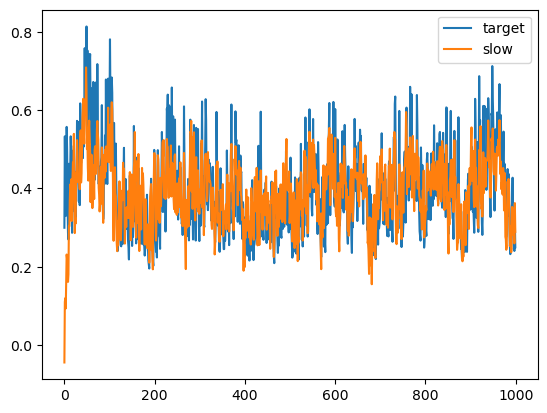

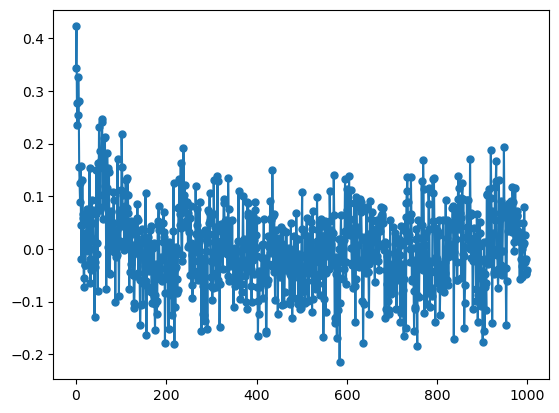

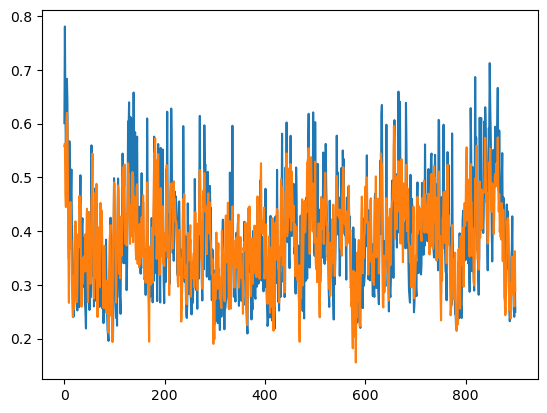

In [34]:
spac = 0
window = 1000

# pick up data

# plotting
plt.figure()
plt.plot(y_test[spac:spac+window],label='target')
plt.plot(pred_s[spac:spac+window],label='slow')
plt.legend()
plt.show()

dif = y_test-pred_s
plt.figure()
plt.plot(dif[spac:spac+window],'o-', markersize=5)
plt.show()

t = y_test.flatten()
t = t[100:]
s = pred_s.flatten()
s = s[100:]
dif = t-s
noise = dif.flatten()  

plt.figure()
plt.plot(t)
plt.plot(s)
plt.show()


##### Scatter Plotting

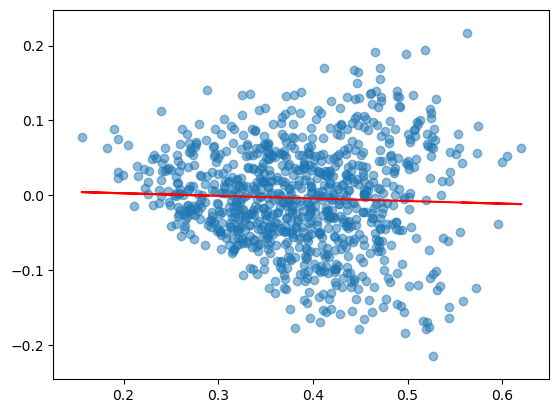

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# pick up data


slope, intercept, r_value, p_value, std_err = linregress(s, noise)
trend_line = slope * s + intercept

plt.figure()
plt.scatter(s, noise, alpha=0.5)
plt.plot(s, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
plt.show()


# mask = (f >= 0.2) & (f <= 0.6)
# filtered_f = f[mask]
# filtered_noise = noise[mask]

# slope, intercept, r_value, p_value, std_err = linregress(filtered_f, filtered_noise)    
# trend_line = slope * filtered_f + intercept

# plt.figure()
# plt.scatter(filtered_f, filtered_noise, alpha=0.5)
# plt.plot(filtered_f, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
# plt.show()

##### pearson coefficient

In [36]:
from scipy.stats import pearsonr, spearmanr

# 计算皮尔逊相关系数
pearson_corr, pearson_p = pearsonr(s, noise)
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.3f}")

# 计算斯皮尔曼相关系数
spearman_corr, spearman_p = spearmanr(s, noise)
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}, p-value: {spearman_p:.3f}")


Pearson Correlation Coefficient: -0.04, p-value: 0.231
Spearman Correlation Coefficient: -0.03, p-value: 0.419


##### Phase error

                    mean       std  count bin_center
binned                                              
(0.156, 0.249]  0.032695  0.029715     33     0.2025
(0.249, 0.341] -0.000203  0.047906    227     0.2950
(0.341, 0.434] -0.013826  0.064948    378     0.3875
(0.434, 0.527]  0.002579  0.086447    232     0.4805
(0.527, 0.62]   0.001843  0.095332     29     0.5735


<Figure size 800x600 with 0 Axes>

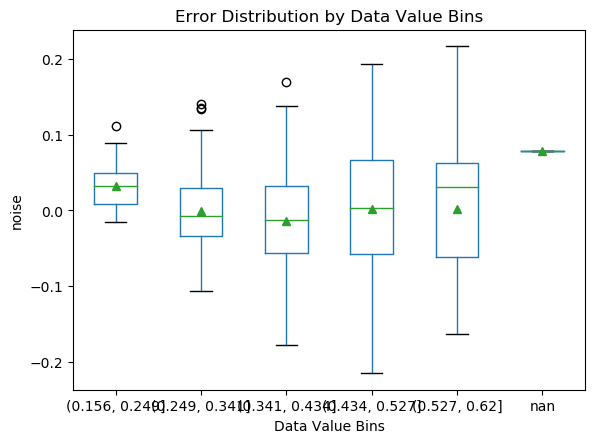

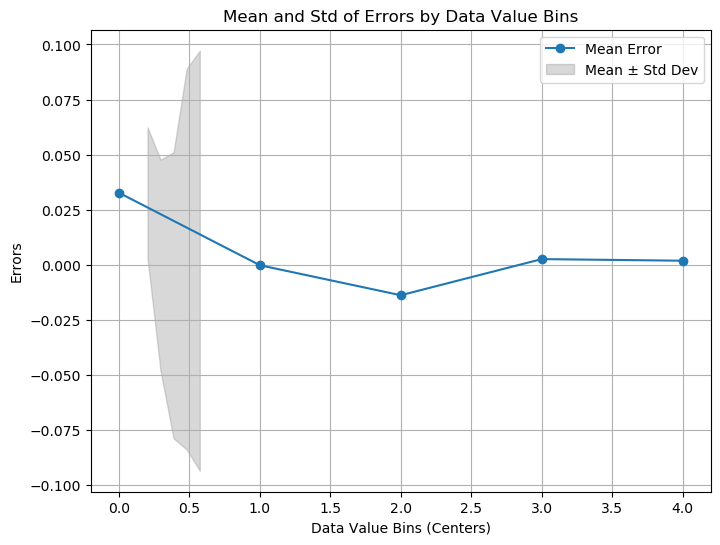

In [37]:
import pandas as pd

data = pd.DataFrame({'s': s, 'noise': noise})

# 按分段划分
bins = np.linspace(data['s'].min(), data['s'].max(), 6)
data['binned'] = pd.cut(data['s'], bins)

# 统计每段的误差特性
grouped = data.groupby('binned')['noise']
stats = grouped.agg(['mean', 'std', 'count'])
stats['bin_center'] = stats.index.map(lambda x: x.mid)  # 计算区间中心点
print(stats)

# 绘制箱线图
data['binned'] = data['binned'].astype(str)  # 转换为字符串类型
plt.figure(figsize=(8, 6))
data.boxplot(column='noise', by='binned', grid=False, showmeans=True)
plt.xlabel("Data Value Bins")
plt.ylabel("noise")
plt.title("Error Distribution by Data Value Bins")
plt.suptitle("")  # 去掉默认副标题
plt.show()

# 绘制均值和标准差趋势
plt.figure(figsize=(8, 6))
plt.plot(stats['bin_center'], stats['mean'], marker='o', label='Mean Error')
plt.fill_between(stats['bin_center'], stats['mean'] - stats['std'], stats['mean'] + stats['std'], 
                 color='gray', alpha=0.3, label='Mean ± Std Dev')

plt.title("Mean and Std of Errors by Data Value Bins")
plt.xlabel("Data Value Bins (Centers)")
plt.ylabel("Errors")
plt.legend()
plt.grid()
plt.show()

ACF & PACF

(900,)
(900,)


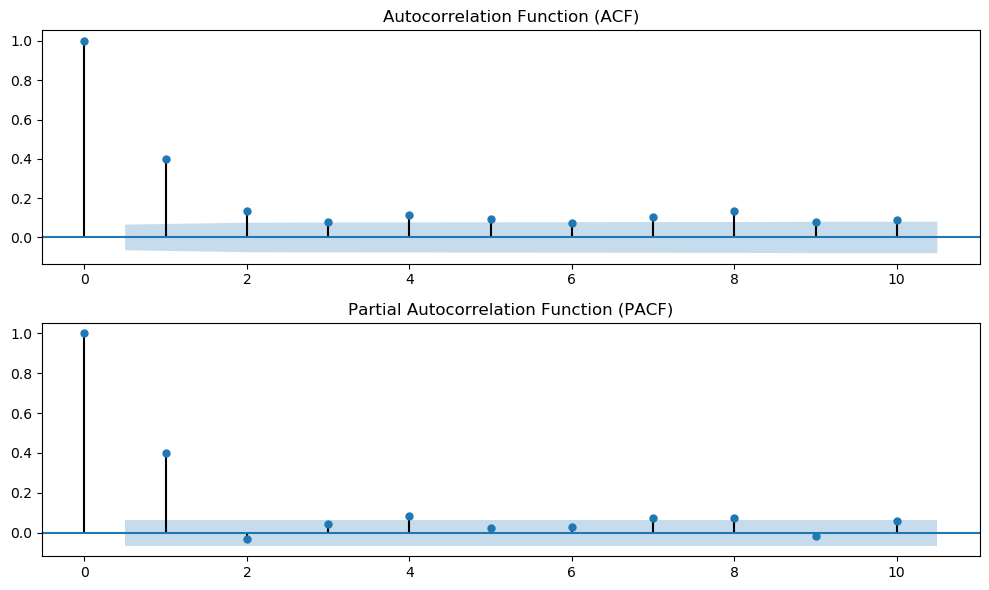

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time = np.arange(0, 900)  # 时间序列

print(time.shape)
print(noise.shape)

# ACF 和 PACF 图
plt.figure(figsize=(10, 6))

# 绘制自相关函数（ACF）
plt.subplot(2, 1, 1)
plot_acf(noise, lags=10, ax=plt.gca())  # 设置最大滞后阶数为 20
plt.title("Autocorrelation Function (ACF)")

# 绘制偏自相关函数（PACF）
plt.subplot(2, 1, 2)
plot_pacf(noise, lags=10, ax=plt.gca(), method='ywm')  # 使用 Yule-Walker 方程
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

##### NARMA2 fitting

Fitted Equation: y = 0.7408 * (0.9057 * x1 + 0.0051 * x1 * x2 + -0.0034)


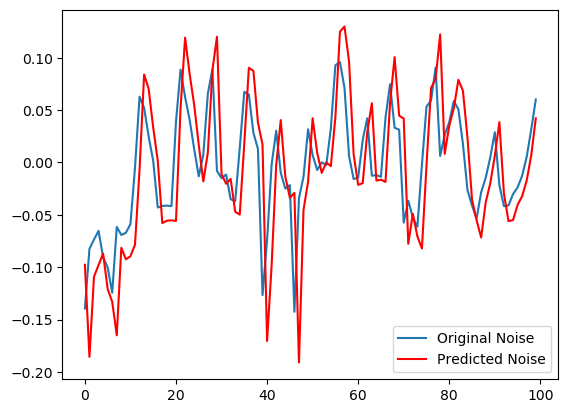

In [150]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler

def narma2_model(x, a, b, c, k):
    x1, x2 = x
    return k * (a * x1 + b * x1 * x2 + c)

# 准备滞后数据
noise_series = pd.Series(noise)  # 噪音时间序列


# 构造滞后数据
lag1 = noise_series.shift(1).dropna().values  # 滞后 1
lag2 = noise_series.shift(2).dropna().values  # 滞后 2

# 对齐滞后数据
lag1 = lag1[1:]  # 对齐到 lag2 的长度
y_data = noise_series[2:].values  # 当前值，从第 2 个元素开始
x_data = np.vstack((lag1, lag2))  # (2, n_samples)

# 数据标准化
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_data_scaled = scaler_x.fit_transform(x_data.T).T  # 转置再标准化
y_data_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1)).ravel()  # 标准化目标值

# 拟合模型
params, _ = curve_fit(narma2_model, x_data_scaled, y_data_scaled)

# 输出拟合的参数
a, b, c, k = params
print(f"Fitted Equation: y = {k:.4f} * ({a:.4f} * x1 + {b:.4f} * x1 * x2 + {c:.4f})")

# 生成预测值
predicted_scaled = narma2_model(x_data_scaled, *params)
predicted = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).ravel()

predicted = predicted*2

# 绘制原始值与预测值
plt.plot(y_data[:100], label="Original Noise")
plt.plot(predicted[:100], label="Predicted Noise", color="red")
plt.legend()
plt.show()



In [151]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_data, predicted)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4e}")
print(f"RMSE: {rmse:.4e}")

nrmse = NRMSE(predicted,y_data)
print(nrmse)


MSE: 2.1120e-03
RMSE: 4.5957e-02
0.7454173995424406


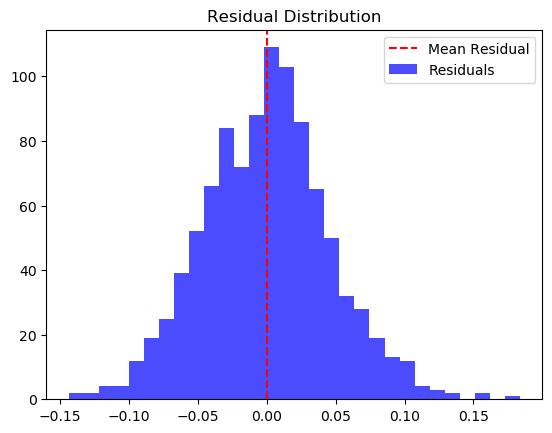

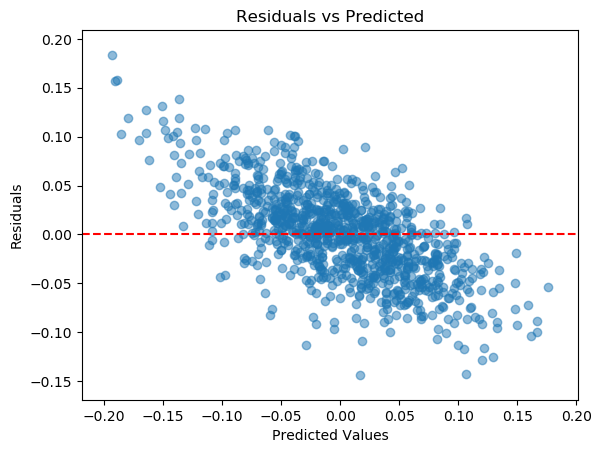

In [152]:
# 计算残差

residuals = y_data - predicted

# 绘制残差分布图

plt.hist(residuals, bins=30, alpha=0.7, color='blue', label='Residuals')
plt.axvline(x=0, color='red', linestyle='--', label='Mean Residual')
plt.title("Residual Distribution")
plt.legend()
plt.show()


# 绘制残差与预测值的散点图
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()



#### use y_train as traget - train data

seed warmup: None
length warmup: 100
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


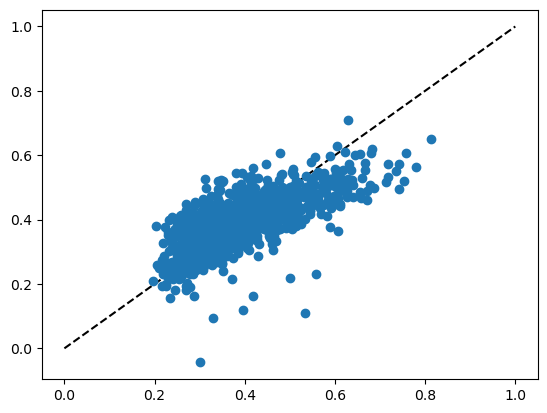

seed warmup: None
length warmup: 100
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


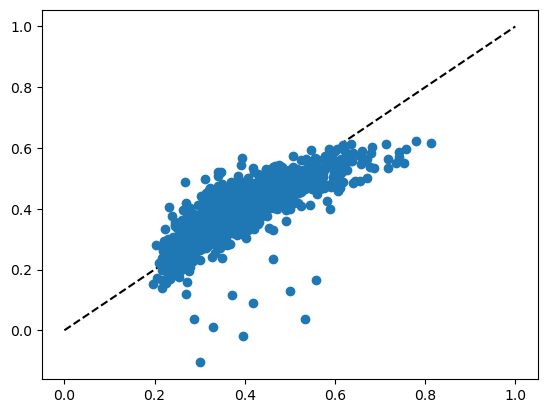

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

(y_train,train_s) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)
(y_train,train_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

##### Difference Plotting

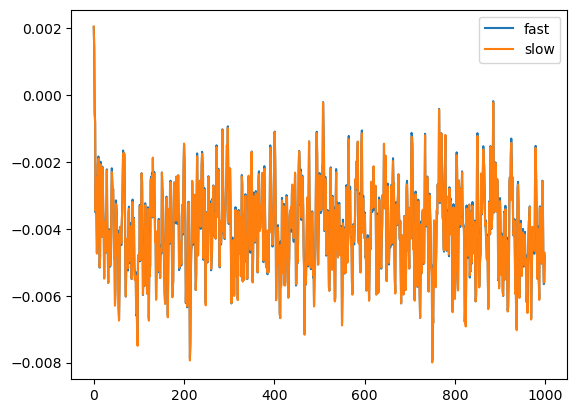

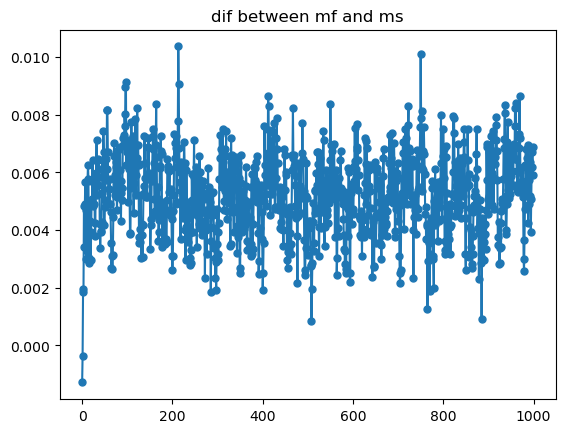

In [7]:
spac = 0
window = 1000

# pick up data
f = train_f[:,0]
s = train_s[:,0]

# plotting
plt.figure()
plt.plot(f[spac:spac+window],label='fast')
plt.plot(s[spac:spac+window],label='slow')
plt.legend()
plt.show()

dif = y_train[:,0]-train_s[:,0]
plt.figure()
plt.plot(dif[spac:spac+window],'o-', markersize=5)
plt.title('dif between mf and ms')
plt.show()

##### Scatter Plotting

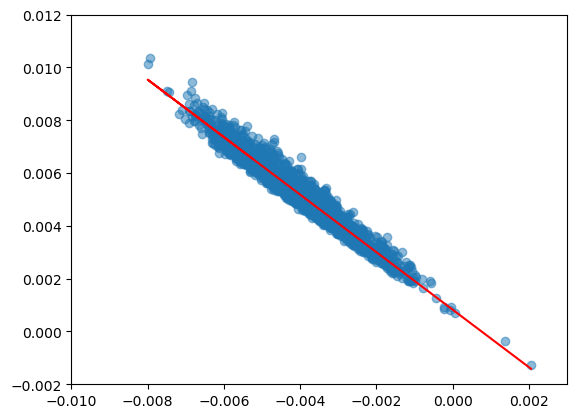

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


noise = dif 

slope, intercept, r_value, p_value, std_err = linregress(s, noise)
trend_line = slope * s + intercept

plt.figure()
plt.scatter(s, noise, alpha=0.5)
plt.plot(s, trend_line, color='red', label=f"Trend Line (R={r_value:.2f})")
plt.xlim(-0.01,0.003)
plt.ylim(-0.002,0.012)

plt.show()

##### Pearson Coefficient

In [14]:
from scipy.stats import pearsonr, spearmanr

# 计算皮尔逊相关系数
pearson_corr, pearson_p = pearsonr(s, noise)
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.3f}")

# 计算斯皮尔曼相关系数
spearman_corr, spearman_p = spearmanr(s, noise)
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}, p-value: {spearman_p:.3f}")

Pearson Correlation Coefficient: -0.97, p-value: 0.000
Spearman Correlation Coefficient: -0.97, p-value: 0.000


##### Phase Error

                          mean       std  count bin_center
binned                                                    
(-0.00799, -0.00599]  0.007852  0.000599    105  -0.006990
(-0.00599, -0.00398]  0.006046  0.000658    874  -0.004985
(-0.00398, -0.00197]  0.004275  0.000665    897  -0.002975
(-0.00197, 4.14e-05]  0.002523  0.000516    120  -0.000964
(4.14e-05, 0.00205]  -0.000325  0.000987      3   0.001046


<Figure size 800x600 with 0 Axes>

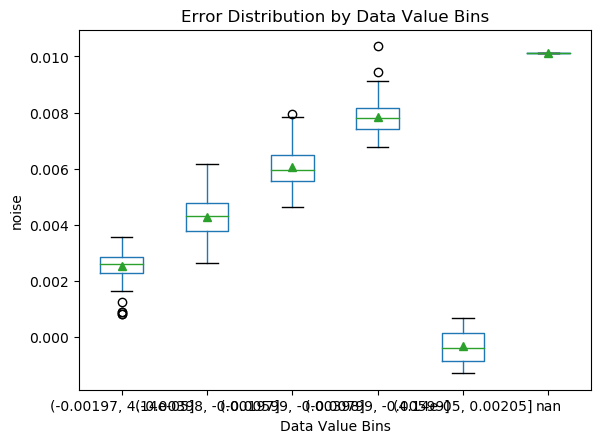

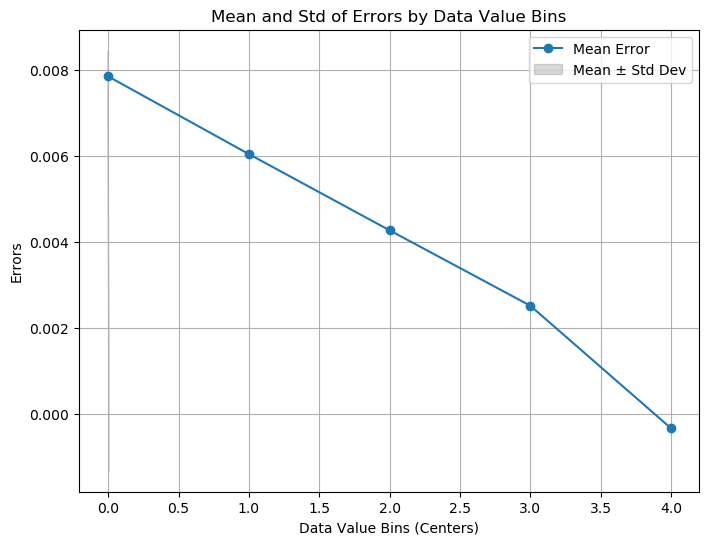

In [16]:
import pandas as pd

data = pd.DataFrame({'s': s, 'noise': noise})

# 按分段划分
bins = np.linspace(data['s'].min(), data['s'].max(), 6)
data['binned'] = pd.cut(data['s'], bins)

# 统计每段的误差特性
grouped = data.groupby('binned')['noise']
stats = grouped.agg(['mean', 'std', 'count'])
stats['bin_center'] = stats.index.map(lambda x: x.mid)  # 计算区间中心点
print(stats)

# 绘制箱线图
data['binned'] = data['binned'].astype(str)  # 转换为字符串类型
plt.figure(figsize=(8, 6))
data.boxplot(column='noise', by='binned', grid=False, showmeans=True)
plt.xlabel("Data Value Bins")
plt.ylabel("noise")
plt.title("Error Distribution by Data Value Bins")
plt.suptitle("")  # 去掉默认副标题
plt.show()

# 绘制均值和标准差趋势
plt.figure(figsize=(8, 6))
plt.plot(stats['bin_center'], stats['mean'], marker='o', label='Mean Error')
plt.fill_between(stats['bin_center'], stats['mean'] - stats['std'], stats['mean'] + stats['std'], 
                 color='gray', alpha=0.3, label='Mean ± Std Dev')

plt.title("Mean and Std of Errors by Data Value Bins")
plt.xlabel("Data Value Bins (Centers)")
plt.ylabel("Errors")
plt.legend()
plt.grid()
plt.show()

##### ACF & PACF

(2000,)
(2000,)


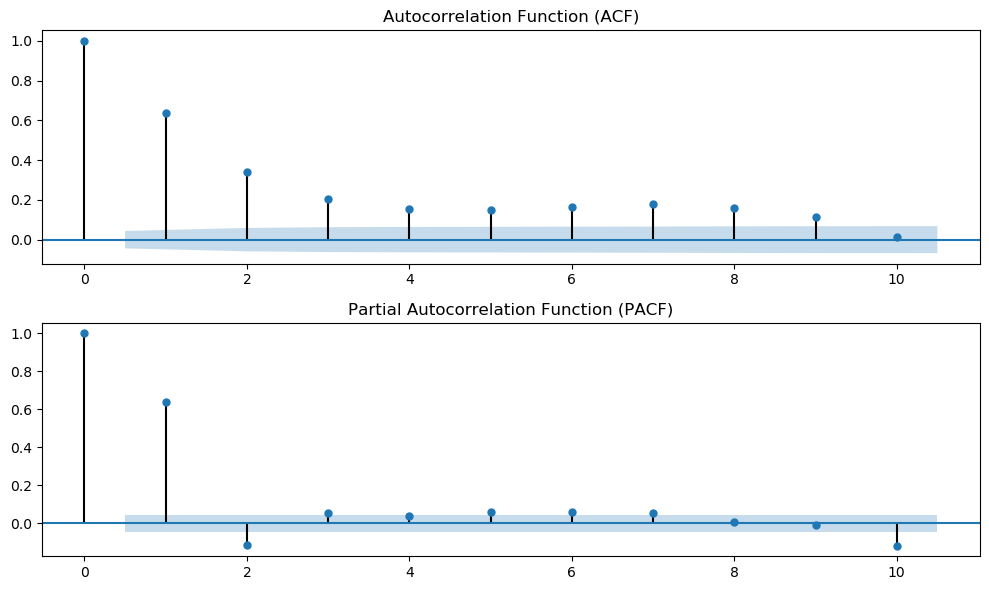

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time = np.arange(0, 2000)  # 时间序列

print(time.shape)
print(noise.shape)

# ACF 和 PACF 图
plt.figure(figsize=(10, 6))

# 绘制自相关函数（ACF）
plt.subplot(2, 1, 1)
plot_acf(noise, lags=10, ax=plt.gca())  # 设置最大滞后阶数为 20
plt.title("Autocorrelation Function (ACF)")

# 绘制偏自相关函数（PACF）
plt.subplot(2, 1, 2)
plot_pacf(noise, lags=10, ax=plt.gca(), method='ywm')  # 使用 Yule-Walker 方程
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

##### Linear Fitting

Linear Model: Noise = -1.0900 * Data + 0.0008


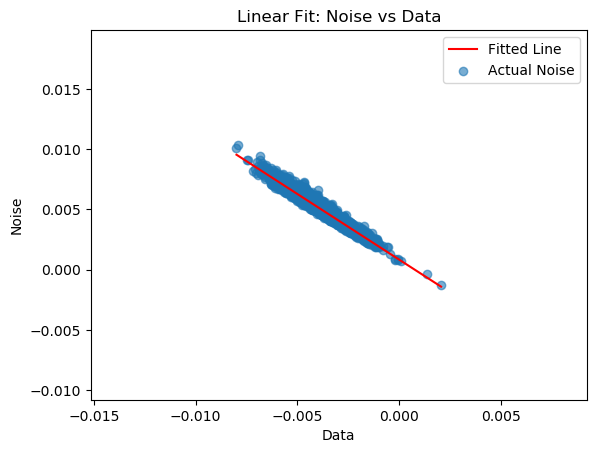

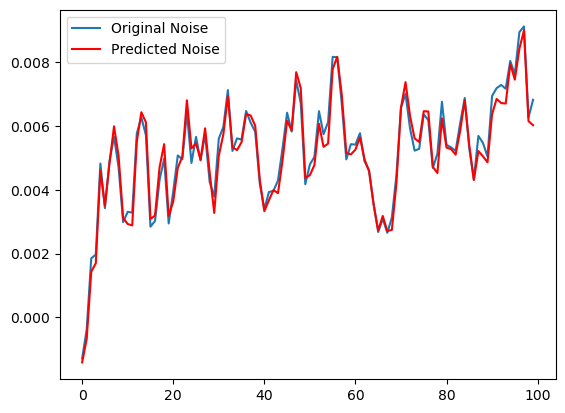

In [21]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def linear_model(s, a, b):
    return a * s + b

params, _ = curve_fit(linear_model, s, noise)
a, b = params
print(f"Linear Model: Noise = {a:.4f} * Data + {b:.4f}")

# 预测噪音
predicted_noise = linear_model(s, a, b)

# 绘制数据点与拟合结果
plt.scatter(s, noise, label="Actual Noise", alpha=0.6)
plt.plot(np.sort(s), linear_model(np.sort(s), a, b), color="red", label="Fitted Line")
plt.xlabel("Data")
plt.ylabel("Noise")
plt.legend()
plt.title("Linear Fit: Noise vs Data")
plt.show()

# 绘制原始值与预测值
plt.plot(noise[:100], label="Original Noise")
plt.plot(predicted_noise[:100], label="Predicted Noise", color="red")
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(noise, predicted_noise)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4e}")
print(f"RMSE: {rmse:.4e}")

nrmse = NRMSE(predicted_noise,noise)
print(nrmse)

MSE: 9.8904e-08
RMSE: 3.1449e-04
0.2298540277189714


#### Test the influence of linear fitting noise in train phase

In [3]:
'''
22/11/24 by Chen

Change the spnc_slow function for the linear fitting noise

'''

import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback

(y_train,S_train) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)


seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
add linear fitting noise
linear_noise: [-0.00143507  0.00122734  0.00350394 ...  0.0074973   0.00774909
  0.00688508]
linear_noise shape: (60000,)
mag shape: (60000,)
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
44.54913035554784 60.311561168029336


##### Difference Plotting

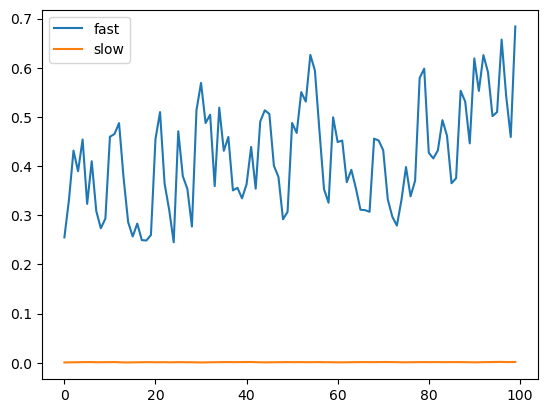

In [9]:
spac = 0
window = 100

# pick up data
y = y_train
s = S_train.flatten()

# plotting
plt.figure()
plt.plot(y[spac:spac+window],label='fast')
plt.plot(s[spac:spac+window],label='slow')
plt.legend()
plt.show()

# dif = y-s
# plt.figure()
# plt.plot(dif[spac:spac+window],'o-', markersize=5)
# plt.title('dif between mf and ms')
# plt.show()

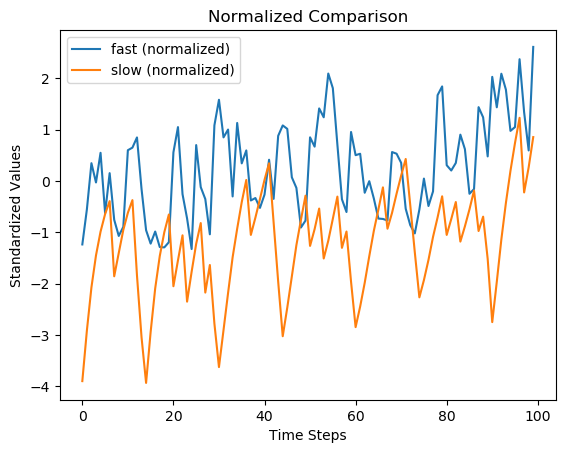

In [10]:
from sklearn.preprocessing import StandardScaler
# 或者使用 MinMaxScaler 进行 0-1 归一化
# from sklearn.preprocessing import MinMaxScaler

# 重塑数据以适应 StandardScaler
y_reshaped = y.reshape(-1, 1)
s_reshaped = s.reshape(-1, 1)

# 创建并应用标准化器
scaler = StandardScaler()
y_normalized = scaler.fit_transform(y_reshaped).flatten()
s_normalized = scaler.fit_transform(s_reshaped).flatten()

# 绘制标准化后的数据
plt.figure()
plt.plot(y_normalized[spac:spac+window], label='fast (normalized)')
plt.plot(s_normalized[spac:spac+window], label='slow (normalized)')
plt.legend()
plt.title('Normalized Comparison')
plt.ylabel('Standardized Values')
plt.xlabel('Time Steps')
plt.show()

#### Add a new judge for noise_train and noise_test, spnc.py was also changed.

test without noise, obtained performances are same with the previous one (uniform noise).

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


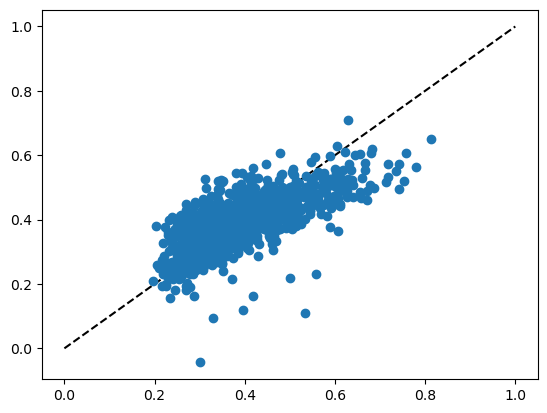

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


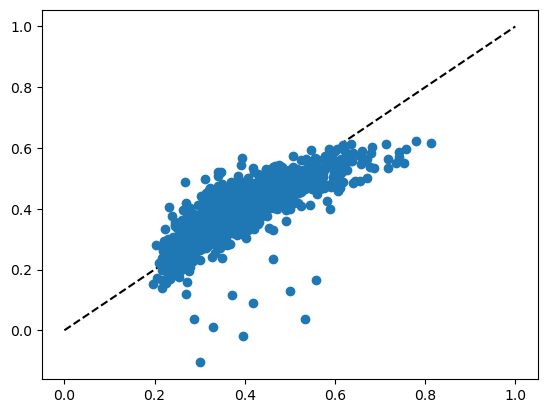

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback
mf = spn.gen_signal_fast_delayed_feedback

train_pred_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)
train_pred_f = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,mf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)








test noise in train

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noise-free testing output
restarted
Spacer NRMSE:0
0.006263460223126876 0.7151351370119321


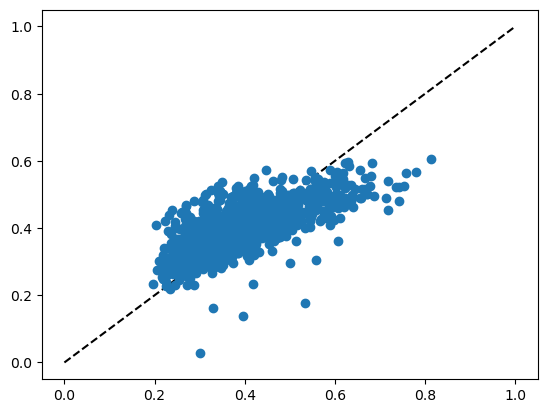

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': True,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback

train_pred_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)


test noise in test

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_train: 2.4e-05
noise-free training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean_test: -0.000125
noisy testing output
restarted
Spacer NRMSE:0
5969.476626357867 698.1505477362741


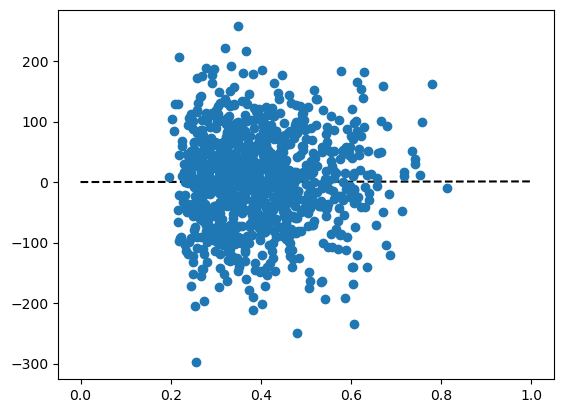

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': False,
    'noise_mean_train':0.000024,
    'noise_std_train':0.000047,
    'noise_test': True,
    'noise_mean_test':-0.000125,    
    'noise_std_test':0.046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback

train_pred_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

test noise in both

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: None
noise_mean_train: 2.4e-05
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: None
noise_mean_test: -1.25e-08
noisy testing output
restarted
Spacer NRMSE:0
0.00737570392399652 0.7760374724800047


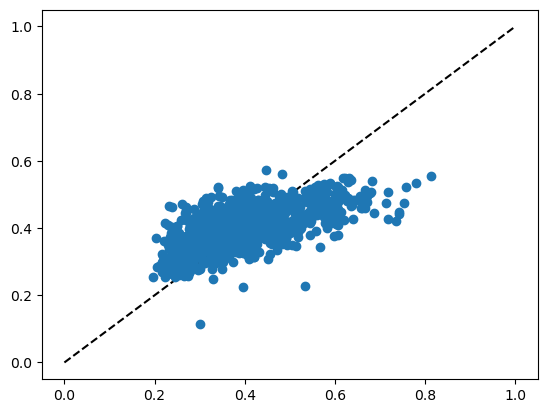

In [ ]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': None,
    'noise_train': True,
    'noise_mean_train':0.0000024,
    'noise_std_train':0.000047,
    'noise_test': True,
    'noise_mean_test':-0.0000000125,    
    'noise_std_test':0.0000046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback

train_pred_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

make a loop to see if there is any interesting things

std:   0%|          | 0/30 [00:00<?, ?it/s]

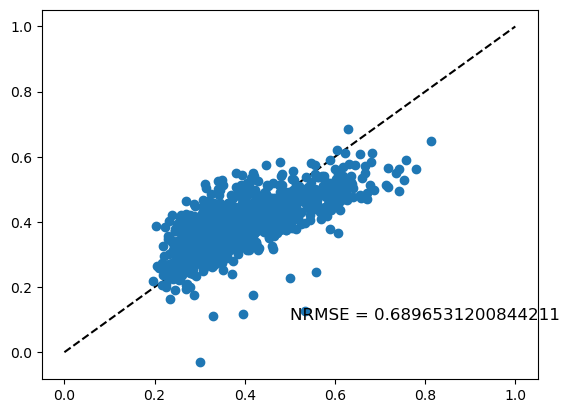

std:   3%|▎         | 1/30 [00:39<19:12, 39.74s/it]

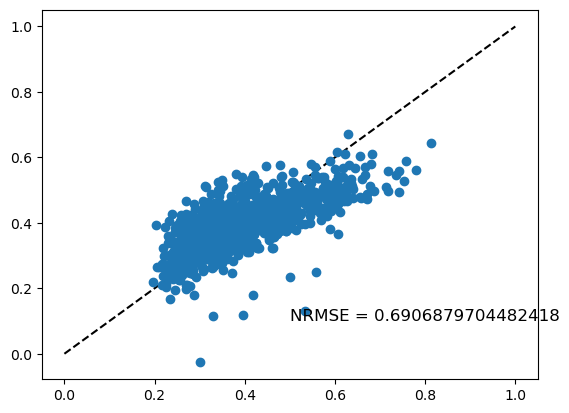

std:   7%|▋         | 2/30 [01:18<18:14, 39.07s/it]

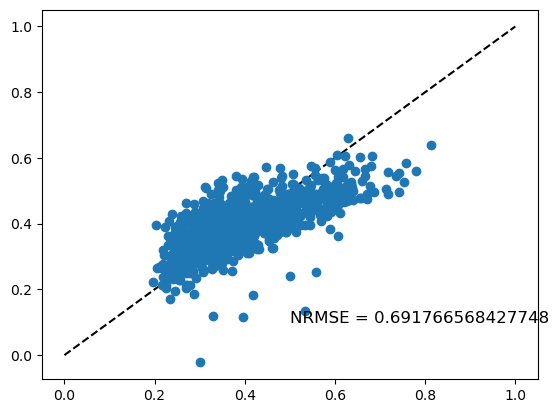

std:  10%|█         | 3/30 [01:56<17:18, 38.45s/it]

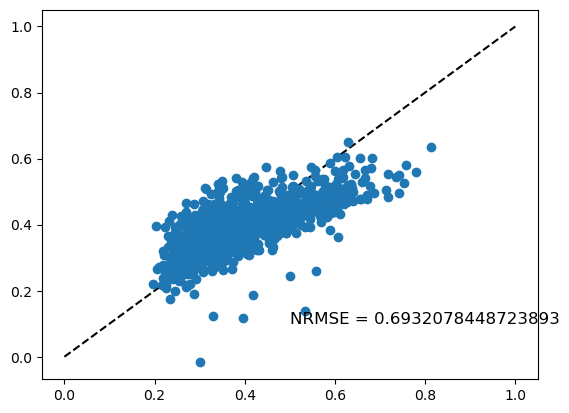

std:  13%|█▎        | 4/30 [02:33<16:31, 38.12s/it]

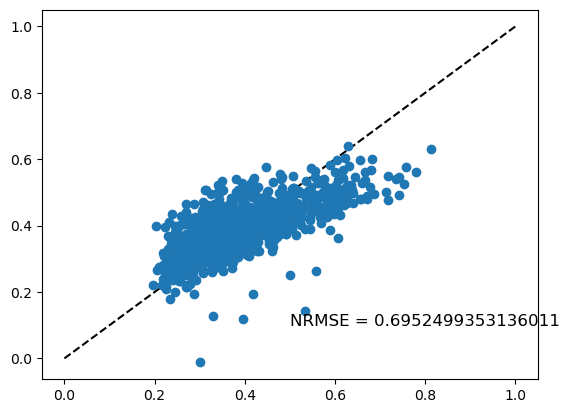

std:  17%|█▋        | 5/30 [03:11<15:47, 37.90s/it]

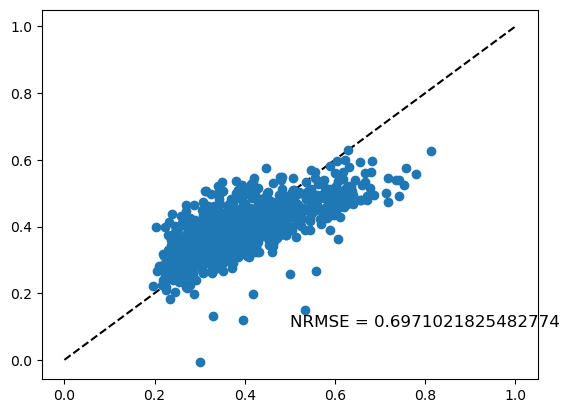

std:  20%|██        | 6/30 [03:48<15:08, 37.84s/it]

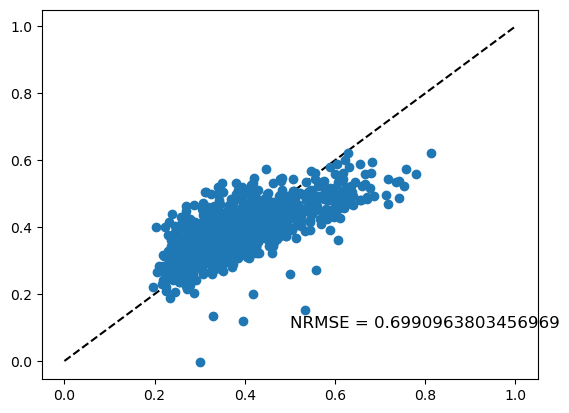

std:  23%|██▎       | 7/30 [04:26<14:29, 37.83s/it]

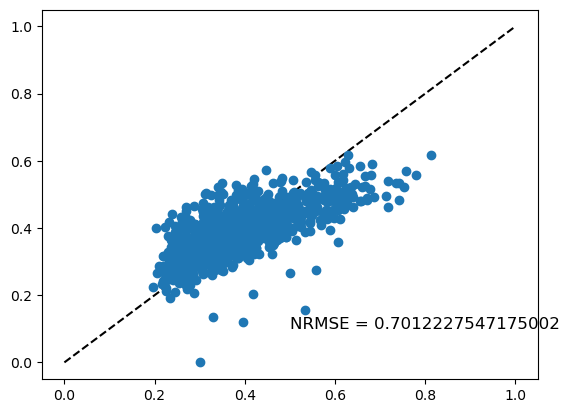

std:  27%|██▋       | 8/30 [05:04<13:51, 37.80s/it]

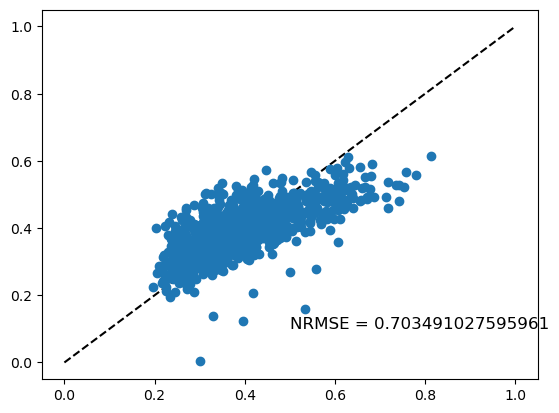

std:  30%|███       | 9/30 [05:43<13:21, 38.15s/it]

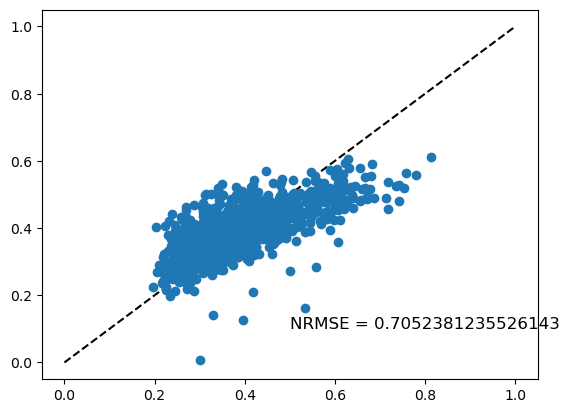

std:  33%|███▎      | 10/30 [06:21<12:43, 38.15s/it]

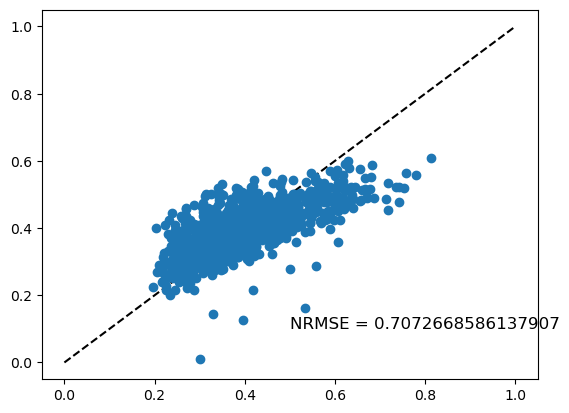

std:  37%|███▋      | 11/30 [06:59<12:05, 38.18s/it]

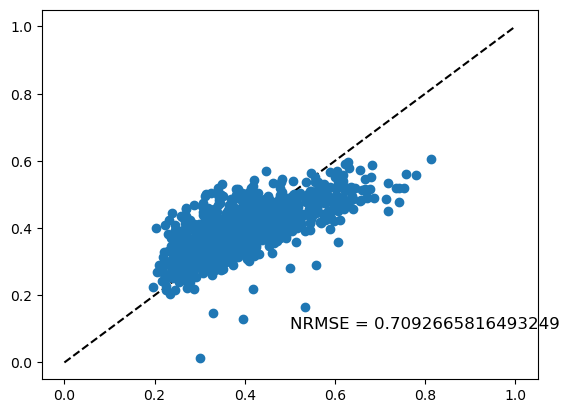

std:  40%|████      | 12/30 [07:37<11:26, 38.15s/it]

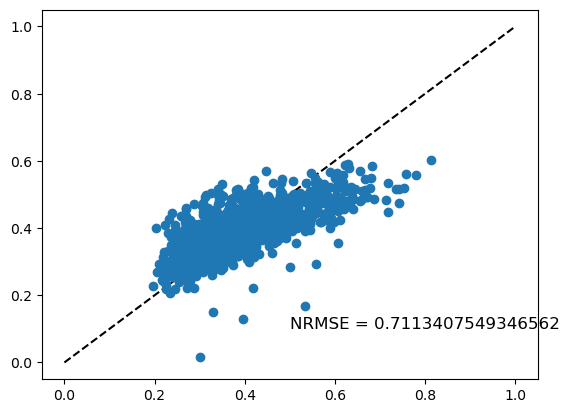

std:  43%|████▎     | 13/30 [08:16<10:50, 38.25s/it]

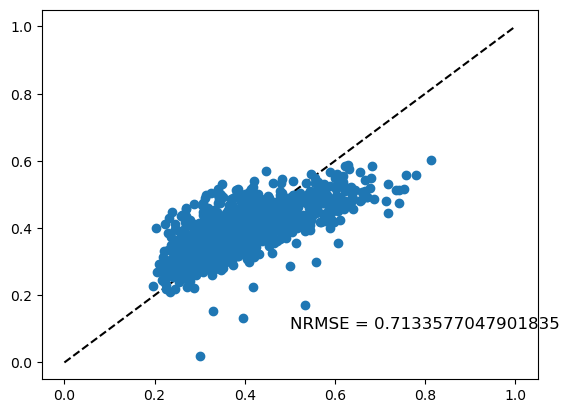

std:  47%|████▋     | 14/30 [08:54<10:11, 38.21s/it]

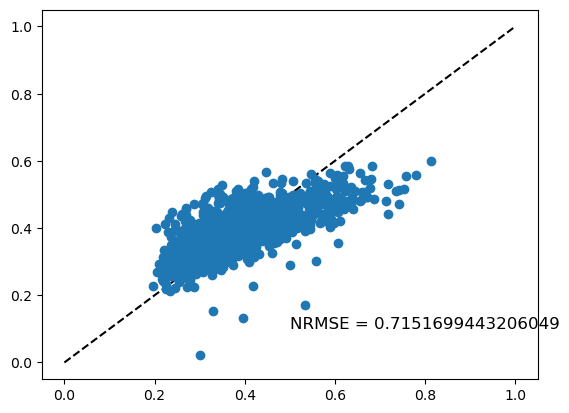

std:  50%|█████     | 15/30 [09:32<09:32, 38.18s/it]

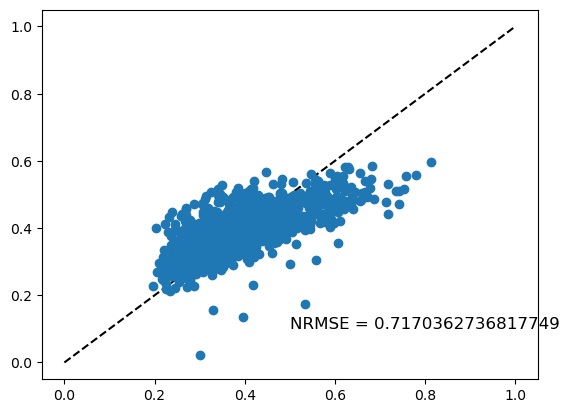

std:  53%|█████▎    | 16/30 [10:11<08:57, 38.36s/it]

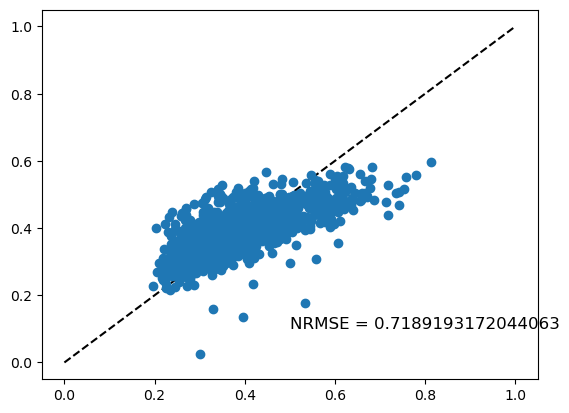

std:  57%|█████▋    | 17/30 [10:49<08:18, 38.33s/it]

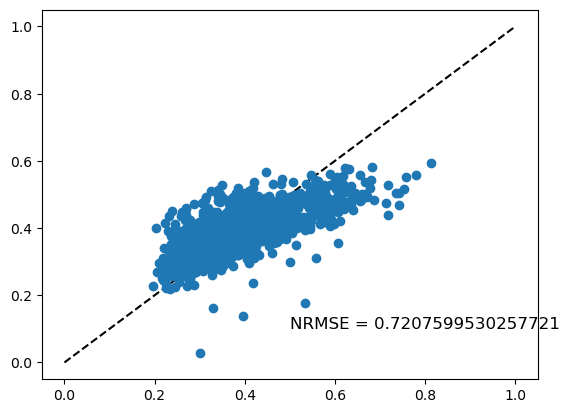

std:  60%|██████    | 18/30 [11:27<07:40, 38.35s/it]

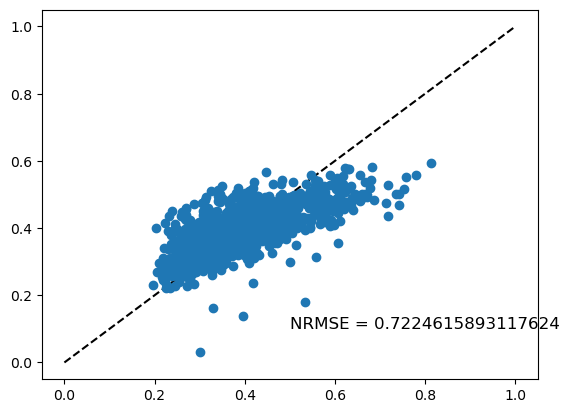

std:  63%|██████▎   | 19/30 [12:06<07:00, 38.25s/it]

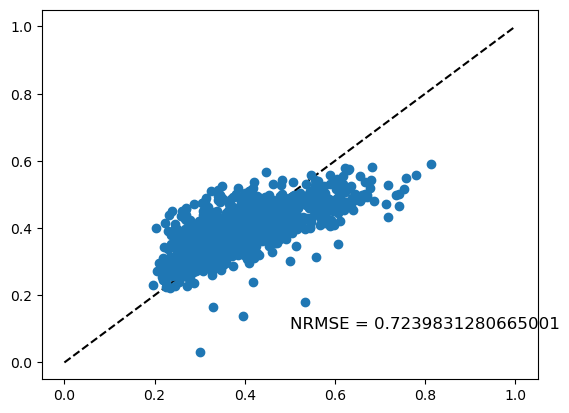

std:  67%|██████▋   | 20/30 [12:44<06:21, 38.17s/it]

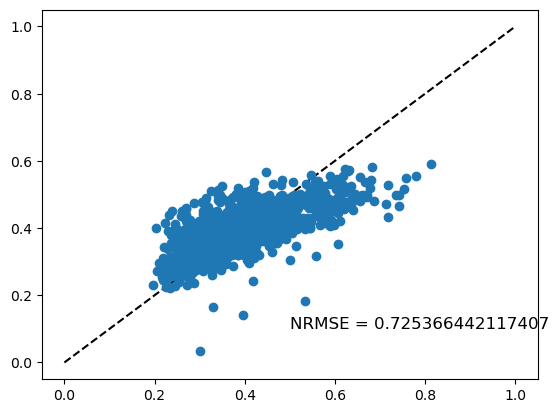

std:  70%|███████   | 21/30 [13:21<05:42, 38.10s/it]

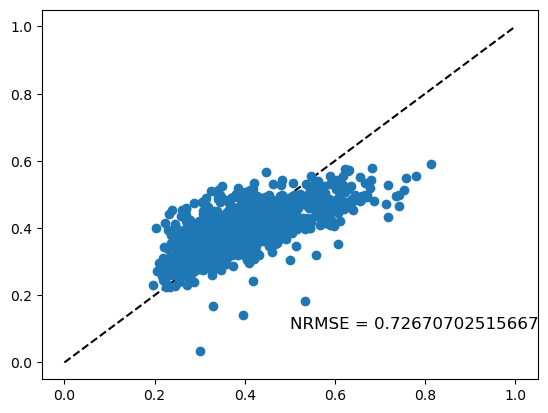

std:  73%|███████▎  | 22/30 [14:00<05:05, 38.14s/it]

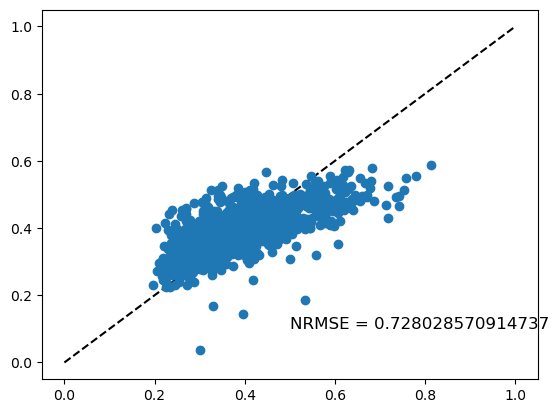

std:  77%|███████▋  | 23/30 [14:39<04:28, 38.37s/it]

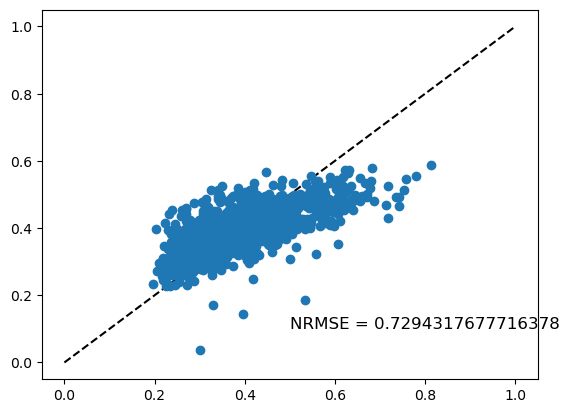

std:  80%|████████  | 24/30 [15:16<03:49, 38.20s/it]

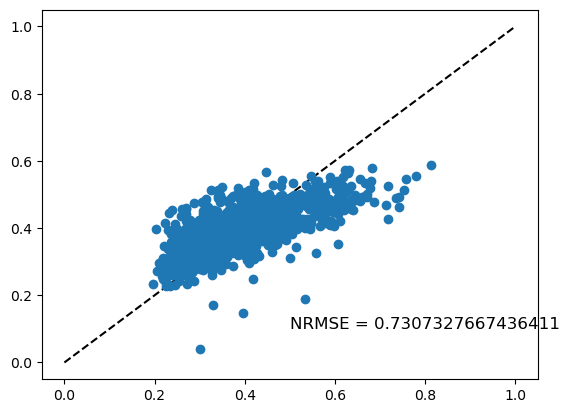

std:  83%|████████▎ | 25/30 [15:54<03:10, 38.17s/it]

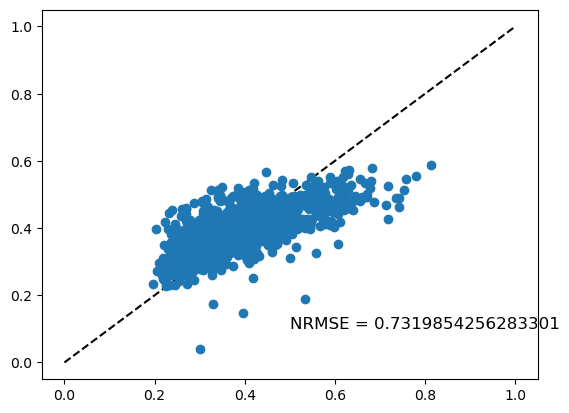

std:  87%|████████▋ | 26/30 [16:33<02:33, 38.26s/it]

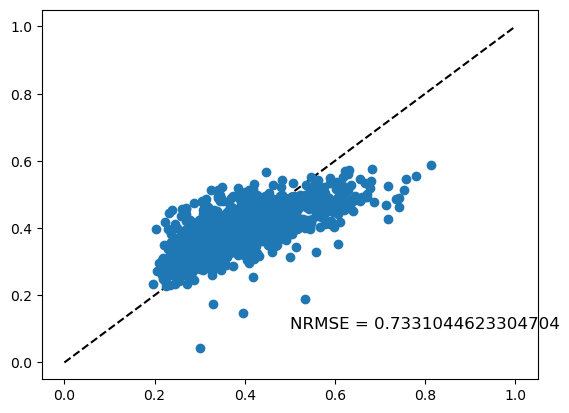

std:  90%|█████████ | 27/30 [17:12<01:55, 38.39s/it]

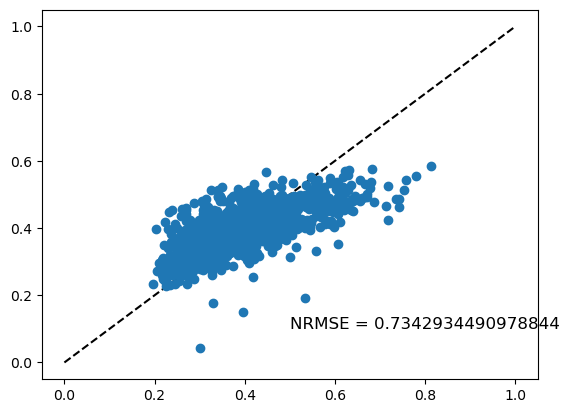

std:  93%|█████████▎| 28/30 [17:50<01:16, 38.38s/it]

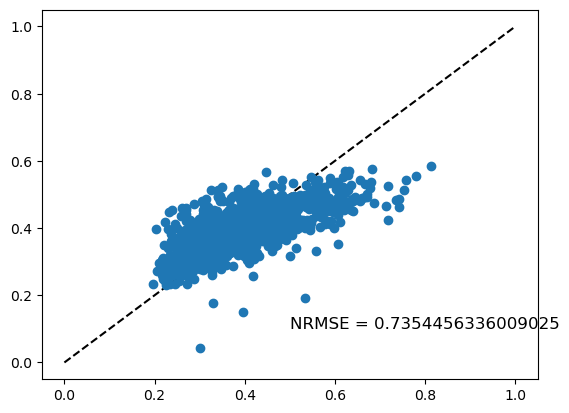

std:  97%|█████████▋| 29/30 [18:29<00:38, 38.42s/it]

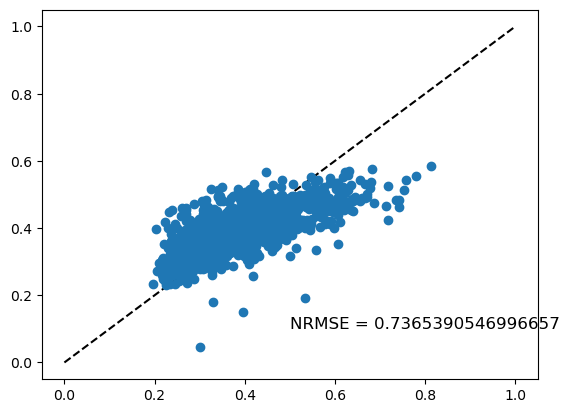

std: 100%|██████████| 30/30 [19:07<00:00, 38.24s/it]


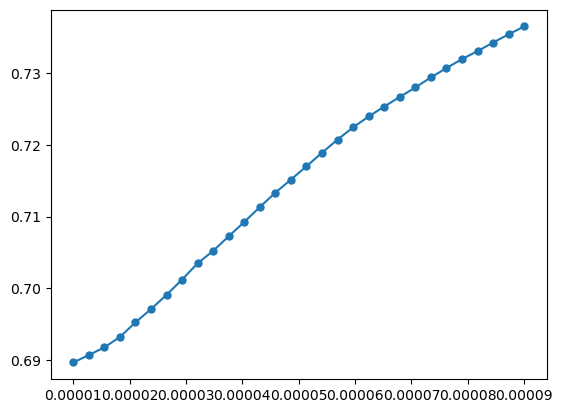

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

from contextmanager import no_print

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': True,
    'noise_mean_train':0.0000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.0000000125,    
    'noise_std_test':0.0000046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
ms = spn.gen_signal_slow_delayed_feedback

std_list = np.linspace(0.00001,0.00009,30)    
nrmses = []

for i in tqdm(std_list,desc='std'):
    with no_print():
        params['noise_std_train'] = i
        nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,ms,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
        nrmses.append(nrmse)

plt.figure()
plt.plot(std_list,nrmses, 'o-', markersize=5)
plt.show()


make a heatmap

In [3]:
from contextmanager import no_print
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 10

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_seed': 1234,
    'noise_train': True,
    'noise_mean_train':0.0000024,
    'noise_std_train':0.000047,
    'noise_test': False,
    'noise_mean_test':-0.0000000125,    
    'noise_std_test':0.0000046011,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


mean_list = np.linspace(-0.000005,0.000005,20)
std_list = np.linspace(0.00000,0.0001,20)

nrmse_list = np.zeros((len(std_list), len(mean_list)))

std_grid, mean_grid = np.meshgrid(std_list, mean_list, indexing='ij')

for i, std in enumerate(tqdm(std_list,desc = 'std loop')):
    for  j, mean in enumerate(tqdm(mean_list,desc = ' mean loop')):
        with no_print():
            params['noise_std_train'] = std
            params['noise_mean_train'] = mean

            spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
            transform = spn.gen_signal_slow_delayed_feedback

            nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)

            nrmse_list[i, j] = nrmse



std loop: 100%|██████████| 20/20 [4:07:12<00:00, 741.61s/it]


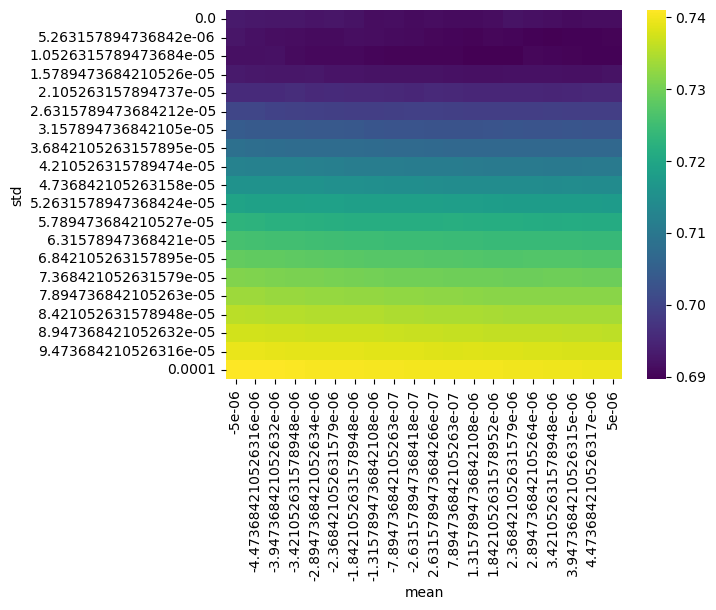

In [4]:
import seaborn as sns
import pandas as pd

data = {
    'std': std_grid.flatten(),
    'mean': mean_grid.flatten(),
    'NRMSE': nrmse_list.flatten()
}

df = pd.DataFrame(data)

plt.figure()
sns.heatmap(df.pivot('std','mean','NRMSE'), cmap='viridis')
plt.show()

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy training output
restarted
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy testing output
restarted
Spacer NRMSE:0
0.009026019442989511 0.8584778365784677


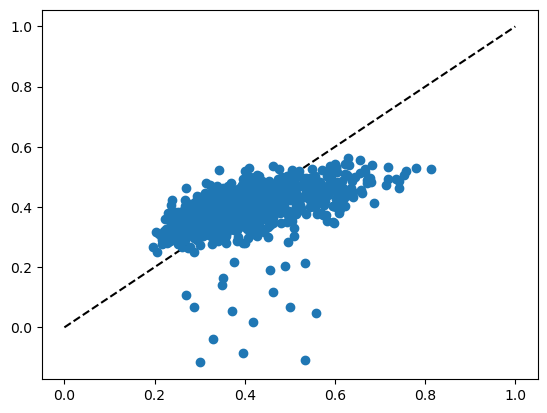

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 1
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':-0.000047,
    'noise_std':0.000054,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spnn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformn = spnn.gen_signal_slow_delayed_feedback

# run
y_train_n = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformn,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

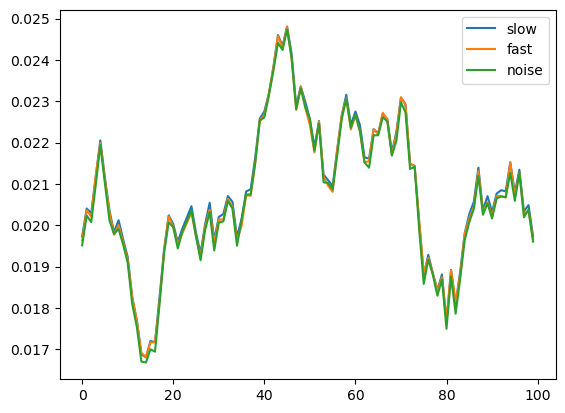

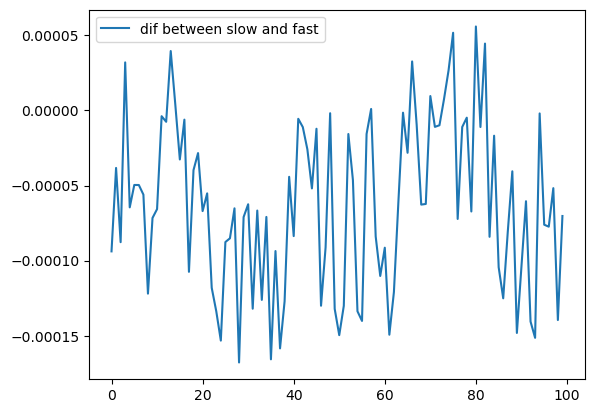

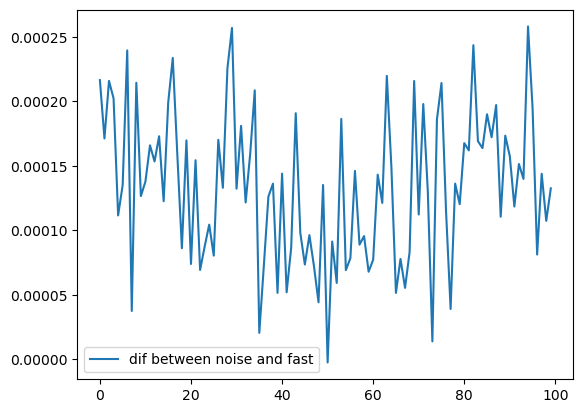

In [7]:
spac = 50
window = 100

plt.figure()
plt.plot(y_train_s[spac:spac+window],label='slow')
plt.plot(y_train_f[spac:spac+window],label='fast')
plt.plot(y_train_n[spac:spac+window],label='noise')
plt.legend()
plt.show()

dif_s_f = y_train_f - y_train_s
plt.figure()
plt.plot(dif_s_f[spac:spac+window],label='dif between slow and fast')
plt.legend()
plt.show()

dif_s_n = y_train_s - y_train_n
plt.figure()
plt.plot(dif_s_n[spac:spac+window],label='dif between noise and fast')
plt.legend()
plt.show()


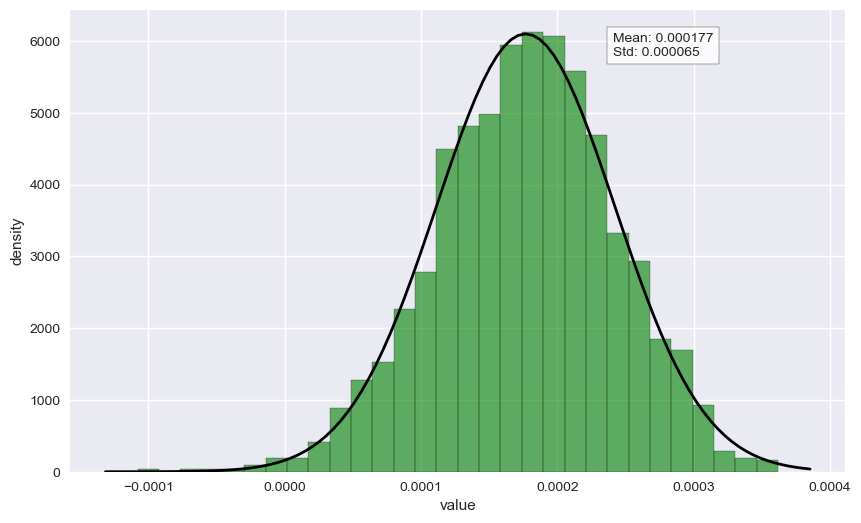

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.figure(figsize=(10, 6))

count, bins, ignored = plt.hist(dif_s_n, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_s_n) 
std_dif = np.std(dif_s_n) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()